## Import libraries and load data

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans 
import matplotlib.pyplot as plt
%matplotlib inline

Problem Statement:

Clustering:

Digital Ads Data:

The ads24x7 is a Digital Marketing company which has now got seed funding of $10 Million. They are expanding their wings in Marketing Analytics. They collected data from their Marketing Intelligence team and now wants you (their newly appointed data analyst) to segment type of ads based on the features provided. Use Clustering procedure to segment ads into homogeneous groups.

The following three features are commonly used in digital marketing:

CPM = (Total Campaign Spend / Number of Impressions) * 1,000. Note that the Total Campaign Spend refers to the 'Spend' Column in the dataset and the Number of Impressions refers to the 'Impressions' Column in the dataset. 

CPC = Total Cost (spend) / Number of Clicks.  Note that the Total Cost (spend) refers to the 'Spend' Column in the dataset and the Number of Clicks refers to the 'Clicks' Column in the dataset. 

CTR = Total Measured Clicks / Total Measured Ad Impressions x 100. Note that the Total Measured Clicks refers to the 'Clicks' Column in the dataset and the Total Measured Ad Impressions refers to the 'Impressions' Column in the dataset. 

The Data Dictionary and the detailed description of the formulas for CPM, CPC and CTR are given in the sheet 2 of the Clustering Clean ads_data Excel File. 

In [92]:
df=pd.read_excel('Clustering+Clean+Ads_Data.xlsx')

## Read the data and perform basic analysis such as printing a few rows (head and tail), info, data summary, null values duplicate values, etc.

In [85]:
# Getting first 10 rows of the table
df.head(10)

,Timestamp,InventoryType,Ad - Length,Ad- Width,Ad Size,Ad Type,Platform,Device Type,Format,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
0,2020-9-2-17,Format1,300,250,75000,Inter222,Video,Desktop,Display,1806,325,323,1,0.00,0.35,0.0,0.0031,0.00,0.00
1,2020-9-2-10,Format1,300,250,75000,Inter227,App,Mobile,Video,1780,285,285,1,0.00,0.35,0.0,0.0035,0.00,0.00
2,2020-9-1-22,Format1,300,250,75000,Inter222,Video,Desktop,Display,2727,356,355,1,0.00,0.35,0.0,0.0028,0.00,0.00
3,2020-9-3-20,Format1,300,250,75000,Inter228,Video,Mobile,Video,2430,497,495,1,0.00,0.35,0.0,0.0020,0.00,0.00
4,2020-9-4-15,Format1,300,250,75000,Inter217,Web,Desktop,Video,1218,242,242,1,0.00,0.35,0.0,0.0041,0.00,0.00
5,2020-9-4-5,Format1,300,250,75000,Inter219,Video,Desktop,Display,490,64,64,2,0.00,0.35,0.0,0.0313,0.01,0.00
6,2020-9-4-6,Format1,300,250,75000,Inter221,App,Mobile,Video,1197,202,202,1,0.01,0.35,0.0,0.0050,0.03,0.01
7,2020-9-6-7,Format1,300,250,75000,Inter228,Video,Mobile,Video,1363,198,196,1,0.00,0.35,0.0,0.0051,0.00,0.00
8,2020-9-8-6,Format1,300,250,75000,Inter223,Web,Mobile,Video,1402,137,136,1,0.00,0.35,0.0,0.0074,0.02,0.00
9,2020-9-11-17,Format1,300,250,75000,Inter228,Video,Mobile,Display,1816,312,311,1,0.00,0.35,0.0,0.0032,0.00,0.00


In [86]:
# Getting last 10 rows of the table
df.tail(10)

,Timestamp,InventoryType,Ad - Length,Ad- Width,Ad Size,Ad Type,Platform,Device Type,Format,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
23056,2020-11-23-4,Format4,120,600,72000,Inter223,Web,Mobile,Video,2,2,2,1,0.10,0.35,0.0650,NaN,NaN,NaN
23057,2020-11-20-2,Format4,120,600,72000,Inter224,Web,Desktop,Display,5,2,2,1,0.07,0.35,0.0455,NaN,NaN,NaN
23058,2020-11-4-3,Format5,720,300,216000,Inter223,Web,Mobile,Video,1,1,1,1,0.08,0.35,0.0520,NaN,NaN,NaN
23059,2020-11-13-4,Format5,720,300,216000,Inter228,Video,Mobile,Display,2,2,2,1,0.07,0.35,0.0455,NaN,NaN,NaN
23060,2020-11-16-5,Format4,120,600,72000,Inter225,Video,Mobile,Display,4,4,4,1,0.14,0.35,0.0910,NaN,NaN,NaN
23061,2020-9-13-7,Format5,720,300,216000,Inter220,Web,Mobile,Video,1,1,1,1,0.07,0.35,0.0455,NaN,NaN,NaN
23062,2020-11-2-7,Format5,720,300,216000,Inter224,Web,Desktop,Video,3,2,2,1,0.04,0.35,0.0260,NaN,NaN,NaN
23063,2020-9-14-22,Format5,720,300,216000,Inter218,App,Mobile,Video,2,1,1,1,0.05,0.35,0.0325,NaN,NaN,NaN
23064,2020-11-18-2,Format4,120,600,72000,inter230,Video,Mobile,Video,7,1,1,1,0.07,0.35,0.0455,NaN,NaN,NaN
23065,2020-9-14-0,Format5,720,300,216000,Inter221,App,Mobile,Video,2,2,2,1,0.09,0.35,0.0585,NaN,NaN,NaN


In [118]:
df.shape

(23066, 19)

In [87]:
# Getting the data type 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23066 entries, 0 to 23065
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Timestamp              23066 non-null  object 
 1   InventoryType          23066 non-null  object 
 2   Ad - Length            23066 non-null  int64  
 3   Ad- Width              23066 non-null  int64  
 4   Ad Size                23066 non-null  int64  
 5   Ad Type                23066 non-null  object 
 6   Platform               23066 non-null  object 
 7   Device Type            23066 non-null  object 
 8   Format                 23066 non-null  object 
 9   Available_Impressions  23066 non-null  int64  
 10  Matched_Queries        23066 non-null  int64  
 11  Impressions            23066 non-null  int64  
 12  Clicks                 23066 non-null  int64  
 13  Spend                  23066 non-null  float64
 14  Fee                    23066 non-null  float64
 15  Re

In [88]:
 #Getting the statistical summary for the numerical variables
df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Ad - Length,23066.0,385.16,233.65,120.00,120.00,300.00,720.00,728.00
Ad- Width,23066.0,337.90,203.09,70.00,250.00,300.00,600.00,600.00
Ad Size,23066.0,96674.47,61538.33,33600.00,72000.00,72000.00,84000.00,216000.00
Available_Impressions,23066.0,2432043.67,4742887.76,1.00,33672.25,483771.00,2527711.75,27592861.00
Matched_Queries,23066.0,1295099.14,2512969.86,1.00,18282.50,258087.50,1180700.00,14702025.00
Impressions,23066.0,1241519.52,2429399.96,1.00,7990.50,225290.00,1112428.50,14194774.00
Clicks,23066.0,10678.52,17353.41,1.00,710.00,4425.00,12793.75,143049.00
Spend,23066.0,2706.63,4067.93,0.00,85.18,1425.12,3121.40,26931.87
Fee,23066.0,0.34,0.03,0.21,0.33,0.35,0.35,0.35
Revenue,23066.0,1924.25,3105.24,0.00,55.37,926.34,2091.34,21276.18


In [89]:
 #checking the duplicate values in the dataset
df.duplicated().sum()

0

In [90]:
 #checking the null values in the dataset
df.isnull().sum()

Timestamp                   0
InventoryType               0
Ad - Length                 0
Ad- Width                   0
Ad Size                     0
Ad Type                     0
Platform                    0
Device Type                 0
Format                      0
Available_Impressions       0
Matched_Queries             0
Impressions                 0
Clicks                      0
Spend                       0
Fee                         0
Revenue                     0
CTR                      4736
CPM                      4736
CPC                      4736
dtype: int64

The shape of the dataset contains the 23066 Rows and  19 columns.
From the above dataset, we can find there are no duplicate values.
There are 4736 null values found in the columns in  CTR, CPC and CPC.
 

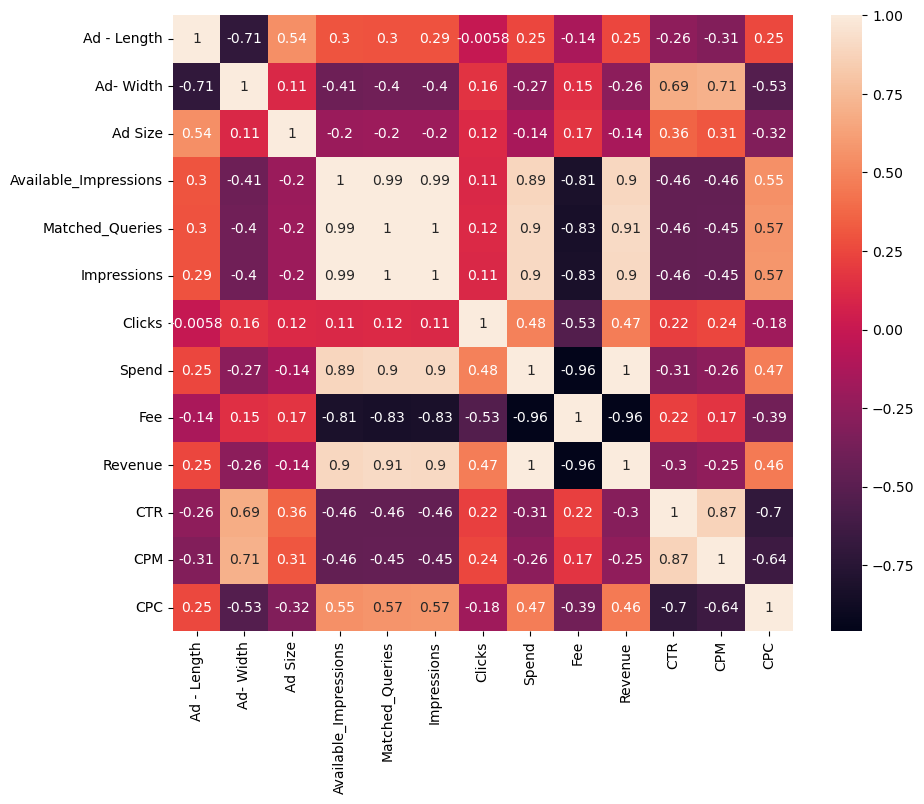

In [96]:
plt.figure(figsize = (10,8))
sns.heatmap(df_num.corr(), annot=True);

## Treat missing values in CPC, CTR and CPM using the formula given.

In [91]:
def calculate_cpc(x):
    spend=df.Spend
    clicks=df.Clicks
    cpc = (spend/clicks)
    return cpc
def calculate_ctr(x):
    clicks=df.Clicks
    impression=df.Impressions
    ctr = (clicks/impression)*100
    return ctr
def calculate_cpm(x):
    spend=df.Spend
    impression=df.Impressions
    cpm = (spend/impression)*1000
    return cpm

In [92]:
df['CPC']= df[['CPC']].apply(lambda x: calculate_cpc(x))


In [93]:
df['CTR']= df[['CTR']].apply(lambda x: calculate_ctr(x))


In [94]:
df['CPM']= df[['CPM']].apply(lambda x: calculate_cpm(x))

In [95]:
 #checking the null values in the dataset
df.isnull().sum()

Timestamp                0
InventoryType            0
Ad - Length              0
Ad- Width                0
Ad Size                  0
Ad Type                  0
Platform                 0
Device Type              0
Format                   0
Available_Impressions    0
Matched_Queries          0
Impressions              0
Clicks                   0
Spend                    0
Fee                      0
Revenue                  0
CTR                      0
CPM                      0
CPC                      0
dtype: int64

## Check if there are any outliers.

In [95]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
lstnumericcolumns = list(df_num.columns.values)
len(lstnumericcolumns)

13

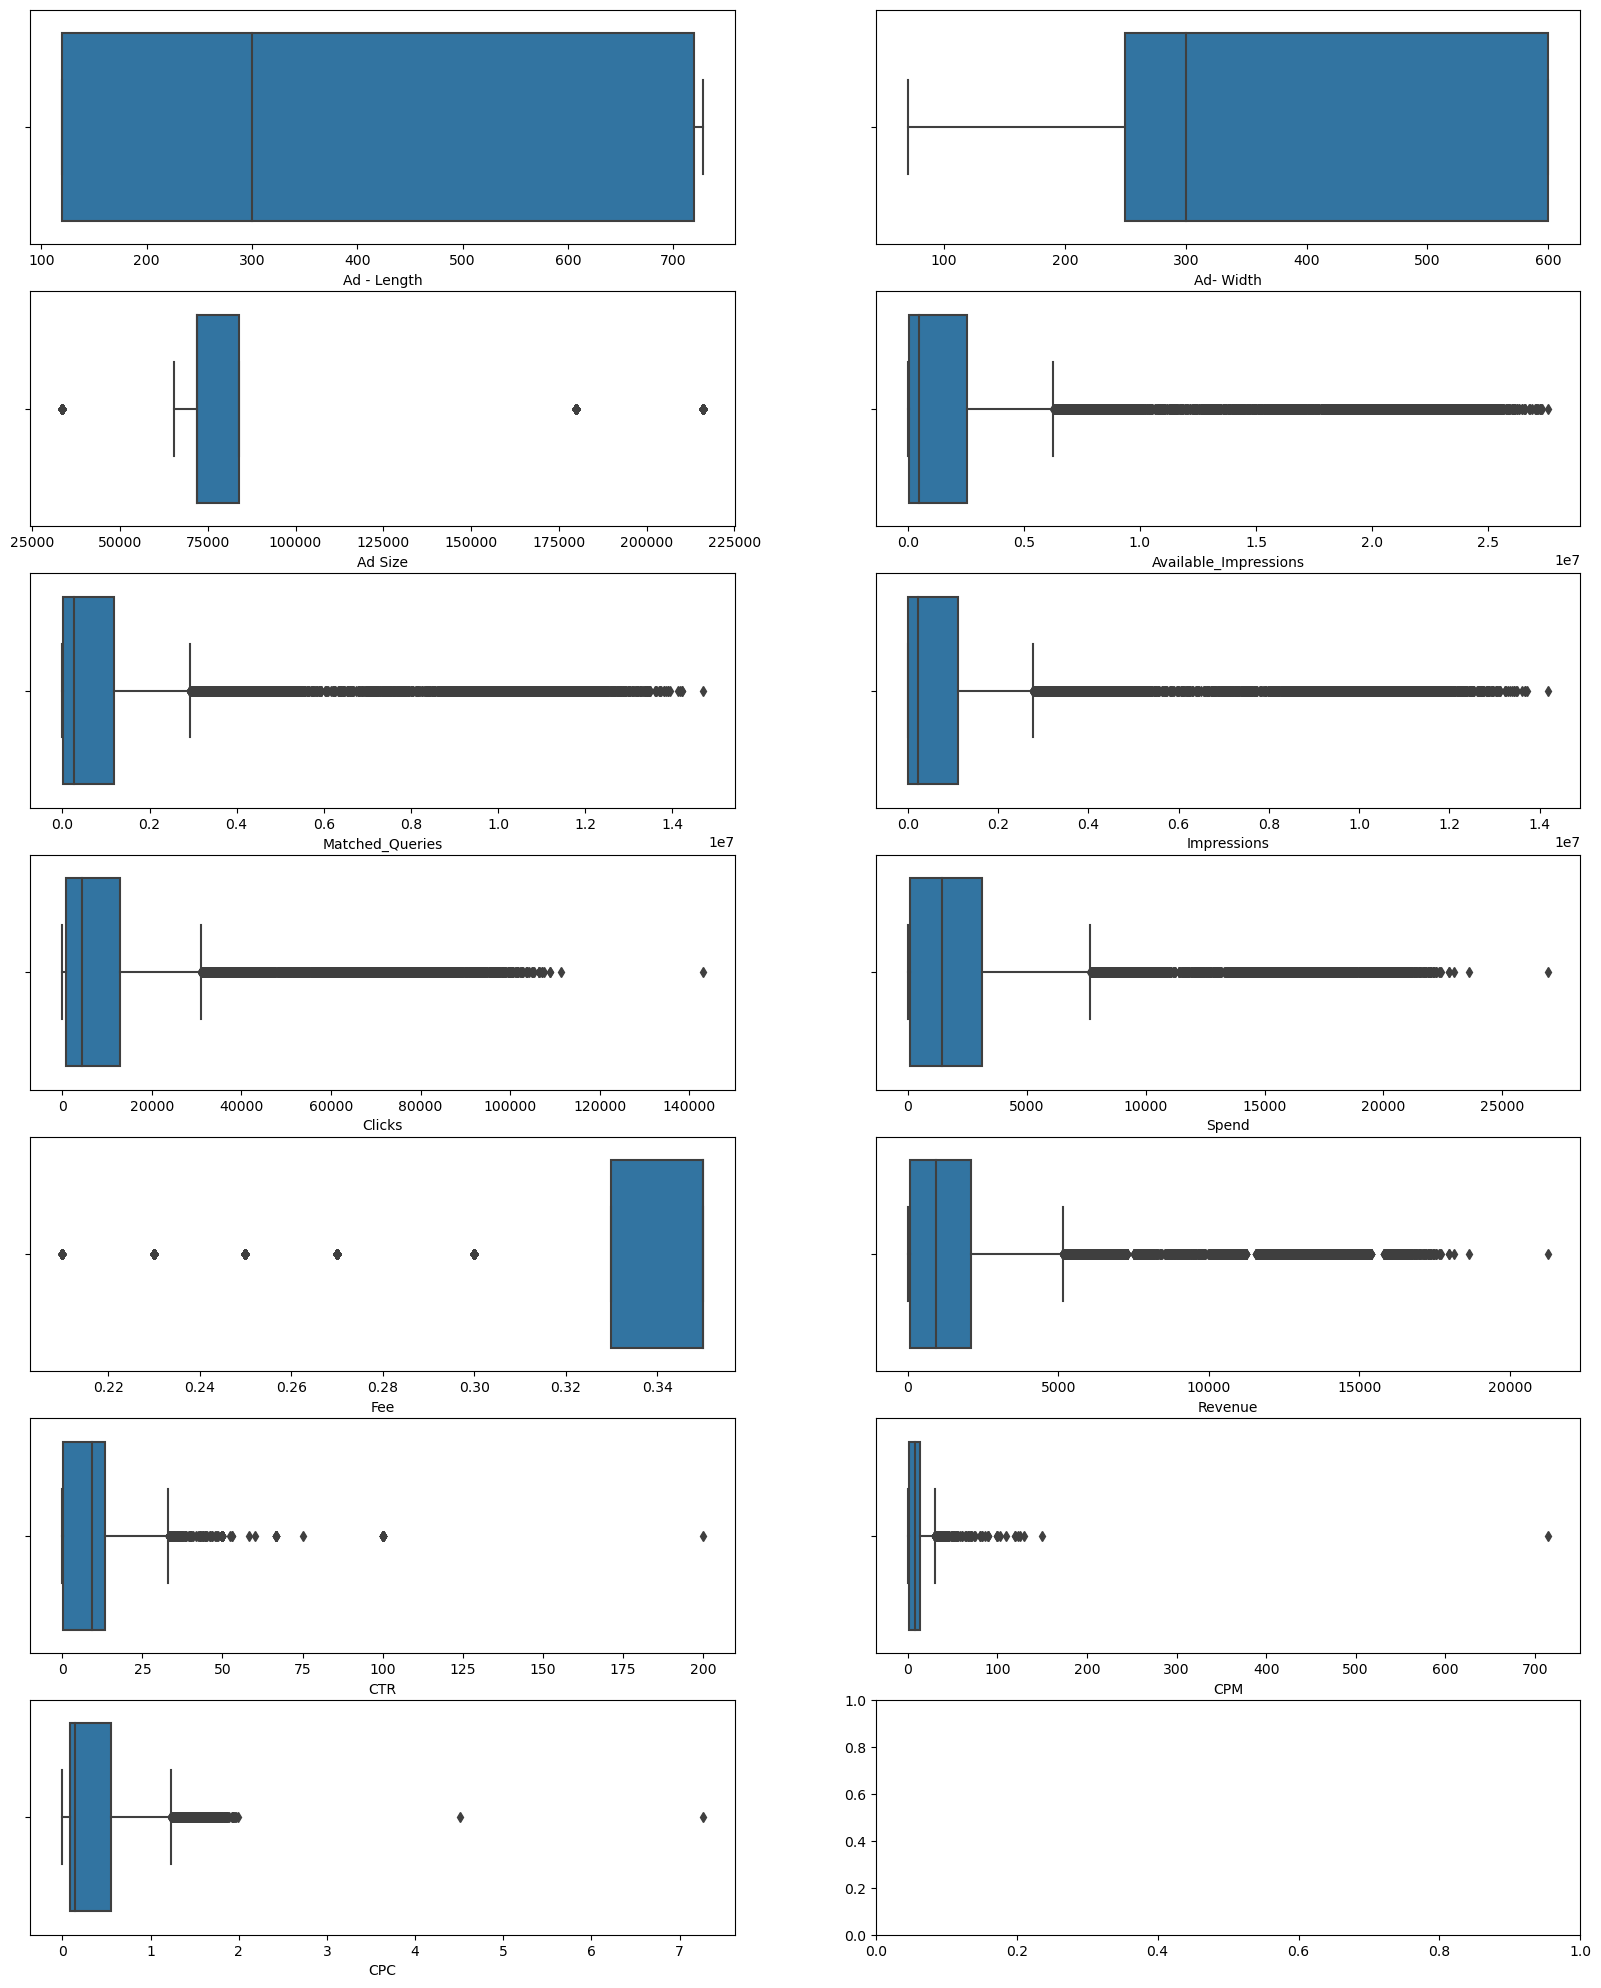

In [96]:

num_cols = df.select_dtypes(include=['int64', 'float64']).columns

fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(20, 25))

for i, col in enumerate(num_cols):
  sns.boxplot(x=df[col], ax=axes[i // 2, i % 2])
  
plt.show()

## Removing the outliers

In [97]:
#K-means clustering is sensitive to outliers so outlier treatment is a must and hence done using  lower  and  upper  nod  method  using  lower_range= Q1-(1.5 * IQR)  and upper_range= Q3+(1.5 * IQR)

In [125]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
lstnumericcolumns = list(df_num.columns.values)
len(lstnumericcolumns)

13

In [127]:
df_num.head()

,Ad - Length,Ad- Width,Ad Size,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
0,300,250,75000,1806,325,323,1,0.0,0.35,0.0,0.309598,0.0,0.0
1,300,250,75000,1780,285,285,1,0.0,0.35,0.0,0.350877,0.0,0.0
2,300,250,75000,2727,356,355,1,0.0,0.35,0.0,0.281690,0.0,0.0
3,300,250,75000,2430,497,495,1,0.0,0.35,0.0,0.202020,0.0,0.0
4,300,250,75000,1218,242,242,1,0.0,0.35,0.0,0.413223,0.0,0.0


In [143]:
def treat_outlier(x):
    # taking 5,25,75 percentile of column
    q5= np.percentile(x,5)
    q25=np.percentile(x,25)
    q75=np.percentile(x,75)
    q95=np.percentile(x,95)
    #calculationg IQR range
    IQR=q75-q25
    #Calculating minimum threshold
    lower_bound=q25-(1.5*IQR)
    upper_bound=q75+(1.5*IQR)
    #Capping outliers
    return x.apply(lambda y: q95 if y > upper_bound else y).apply(lambda y: q5 if y < lower_bound else y)

In [144]:
no_outlier = ['Ad - Length','Ad- Width']

In [145]:
outlier_list = [x for x in df_num.columns if x not in no_outlier]

In [146]:
outlier_list

['Ad Size',
 'Available_Impressions',
 'Matched_Queries',
 'Impressions',
 'Clicks',
 'Spend',
 'Fee',
 'Revenue',
 'CTR',
 'CPM',
 'CPC']

In [147]:
for i in df_num[outlier_list]:    
    df_num[i]=treat_outlier(df_num[i])

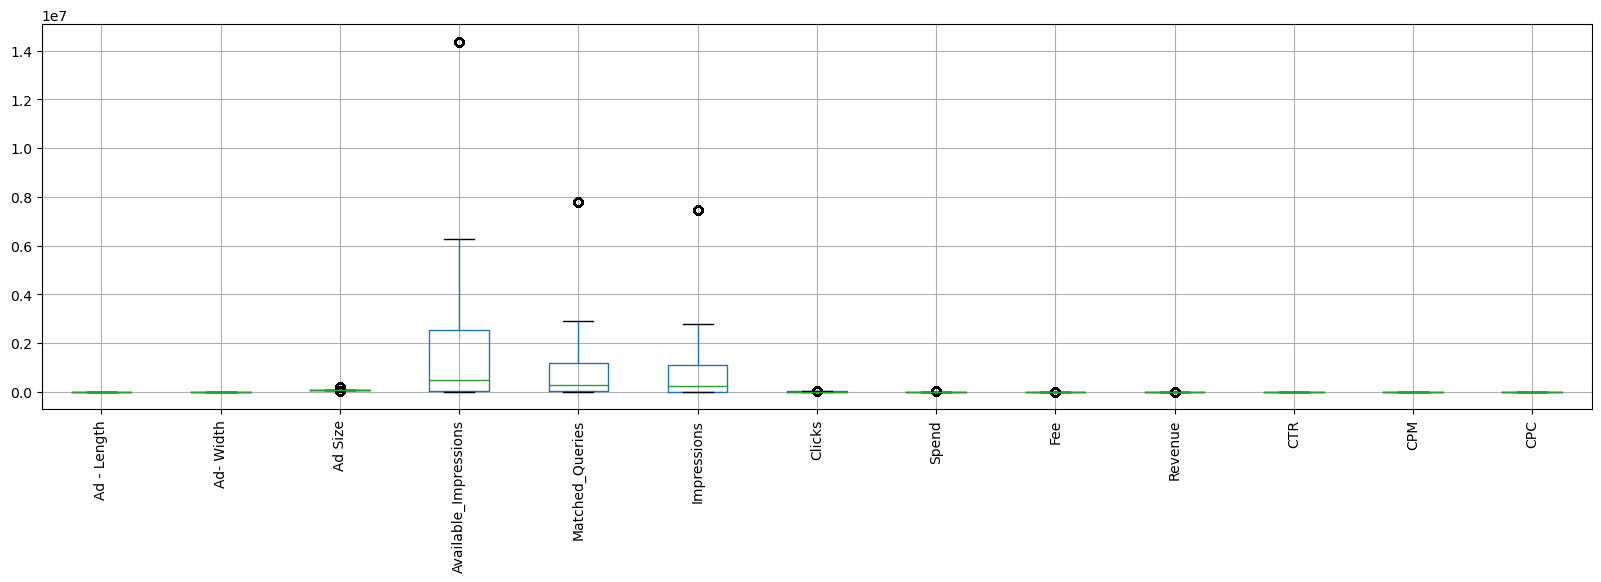

In [148]:
df_num.boxplot(figsize=(20,5))
plt.xticks(rotation=90)
plt.show()

## Perform z-score scaling and discuss how it affects the speed of the algorithm.

In [149]:
from scipy.stats import zscore
df_num_scaled=df_num.apply(zscore)
df_num_scaled.head()

,Ad - Length,Ad- Width,Ad Size,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
0,-0.364496,-0.432797,-0.359227,-0.569519,-0.567112,-0.564001,-0.719113,-0.722601,0.487214,-0.675977,-0.999552,-1.067345,-0.908579
1,-0.364496,-0.432797,-0.359227,-0.569525,-0.567127,-0.564016,-0.719113,-0.722601,0.487214,-0.675977,-0.994180,-1.067345,-0.908579
2,-0.364496,-0.432797,-0.359227,-0.569304,-0.567100,-0.563988,-0.719113,-0.722601,0.487214,-0.675977,-1.003184,-1.067345,-0.908579
3,-0.364496,-0.432797,-0.359227,-0.569373,-0.567045,-0.563932,-0.719113,-0.722601,0.487214,-0.675977,-1.013552,-1.067345,-0.908579
4,-0.364496,-0.432797,-0.359227,-0.569656,-0.567143,-0.564033,-0.719113,-0.722601,0.487214,-0.675977,-0.986066,-1.067345,-0.908579


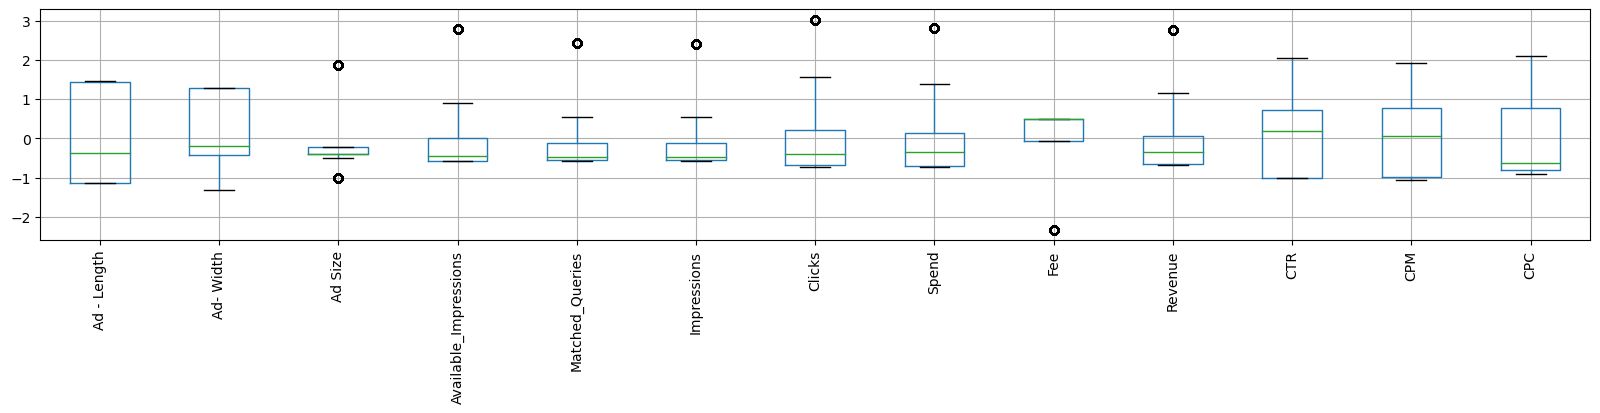

In [150]:
df_num_scaled.boxplot(figsize=(20,3))
plt.xticks(rotation=90)
plt.show()

## Perform Hierarchical by constructing a Dendrogram using WARD and Euclidean distance.

In [137]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [151]:
wardlink = linkage(df_num_scaled, method = 'ward', metric ='euclidean')

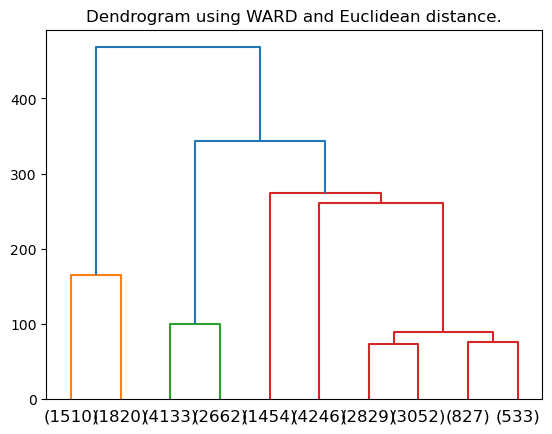

In [155]:
dend = dendrogram(wardlink,truncate_mode='lastp',
                 p = 10,
                 )
plt.title('Dendrogram using WARD and Euclidean distance.')
plt.show()

In [156]:
from scipy.cluster.hierarchy import fcluster

In [157]:
clusters = fcluster(wardlink,5, criterion='maxclust')
clusters

array([2, 2, 2, ..., 4, 5, 4], dtype=int32)

In [158]:
df['clusters'] = clusters

In [159]:
df.clusters.value_counts()

clusters
5    7241
2    6795
4    4246
1    3330
3    1454
Name: count, dtype: int64

In [164]:
df

,Timestamp,InventoryType,Ad - Length,Ad- Width,Ad Size,Ad Type,Platform,Device Type,Format,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC,clusters
0,2020-9-2-17,Format1,300,250,75000,Inter222,Video,Desktop,Display,1806,325,323,1,0.00,0.35,0.0000,0.309598,0.0,0.00,2
1,2020-9-2-10,Format1,300,250,75000,Inter227,App,Mobile,Video,1780,285,285,1,0.00,0.35,0.0000,0.350877,0.0,0.00,2
2,2020-9-1-22,Format1,300,250,75000,Inter222,Video,Desktop,Display,2727,356,355,1,0.00,0.35,0.0000,0.281690,0.0,0.00,2
3,2020-9-3-20,Format1,300,250,75000,Inter228,Video,Mobile,Video,2430,497,495,1,0.00,0.35,0.0000,0.202020,0.0,0.00,2
4,2020-9-4-15,Format1,300,250,75000,Inter217,Web,Desktop,Video,1218,242,242,1,0.00,0.35,0.0000,0.413223,0.0,0.00,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23061,2020-9-13-7,Format5,720,300,216000,Inter220,Web,Mobile,Video,1,1,1,1,0.07,0.35,0.0455,100.000000,70.0,0.07,4
23062,2020-11-2-7,Format5,720,300,216000,Inter224,Web,Desktop,Video,3,2,2,1,0.04,0.35,0.0260,50.000000,20.0,0.04,4
23063,2020-9-14-22,Format5,720,300,216000,Inter218,App,Mobile,Video,2,1,1,1,0.05,0.35,0.0325,100.000000,50.0,0.05,4
23064,2020-11-18-2,Format4,120,600,72000,inter230,Video,Mobile,Video,7,1,1,1,0.07,0.35,0.0455,100.000000,70.0,0.07,5


In [165]:
analysis=df[['clusters','Ad - Length','Ad- Width','Available_Impressions','Matched_Queries','Impressions','Clicks','Spend','Fee','Revenue','CTR','CPM','CPC']]
analysis.groupby('clusters').mean()

,Ad - Length,Ad- Width,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
clusters,,,,,,,,,,,,
1,488.666667,189.810811,1.172432e+07,6.350334e+06,6.144069e+06,12542.445646,9692.230670,0.281796,7200.513204,0.213225,1.540055,0.755331
2,418.646652,148.232524,2.057579e+06,1.009505e+06,9.701911e+05,3465.703164,1738.297186,0.347310,1139.830653,0.387728,1.785516,0.567322
3,144.660248,568.466300,8.392876e+05,5.870326e+05,4.952795e+05,67693.137552,7168.359319,0.286169,5155.231214,13.773813,15.057546,0.109326
4,720.000000,300.000000,2.440302e+05,1.334844e+05,1.132786e+05,14031.383891,1213.779016,0.349543,790.501469,13.978391,12.149377,0.089515
5,158.093081,559.901947,1.129404e+05,6.162672e+04,5.297255e+04,3175.229941,382.222135,0.349586,249.933791,15.365237,14.216383,0.118293


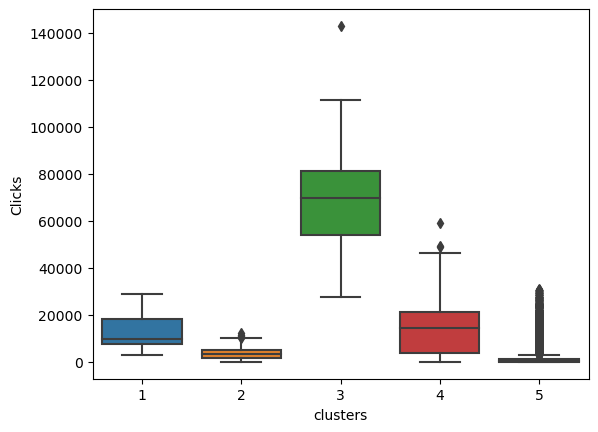

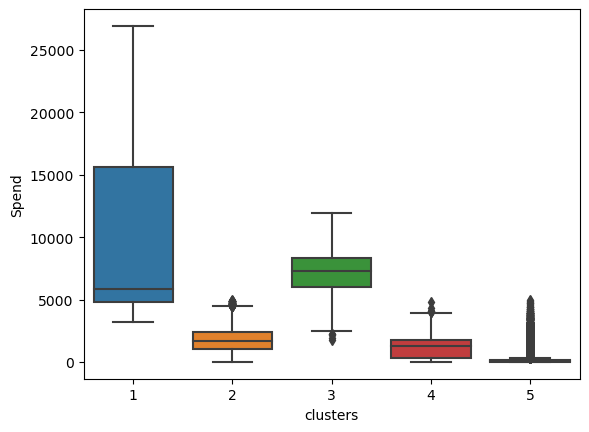

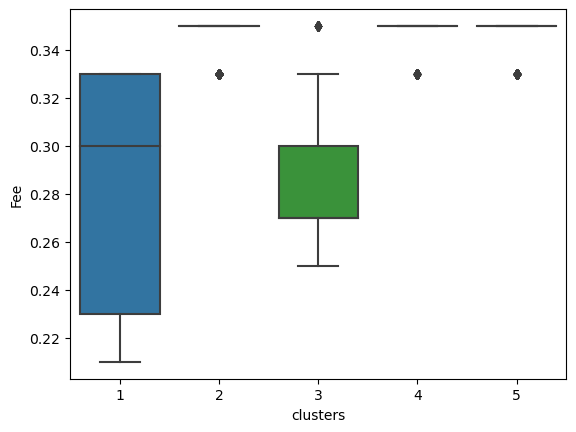

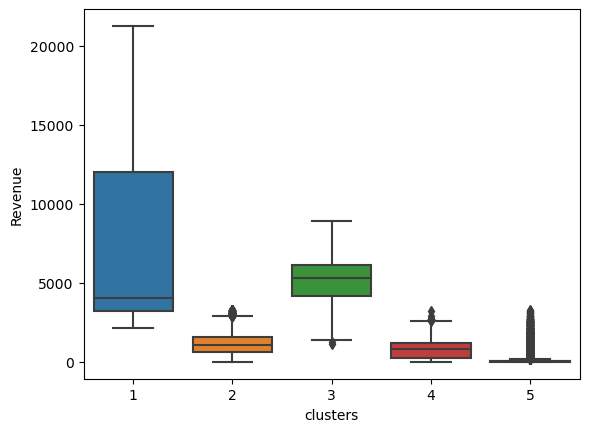

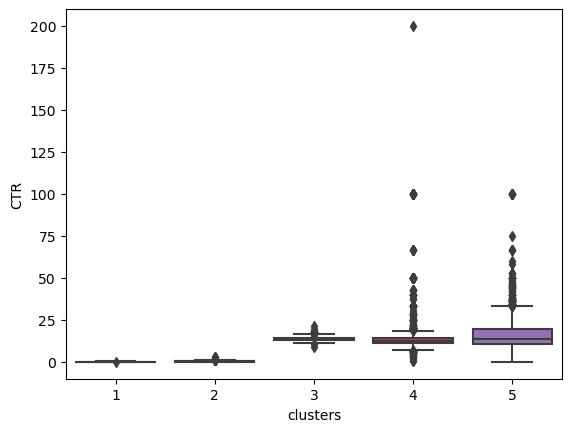

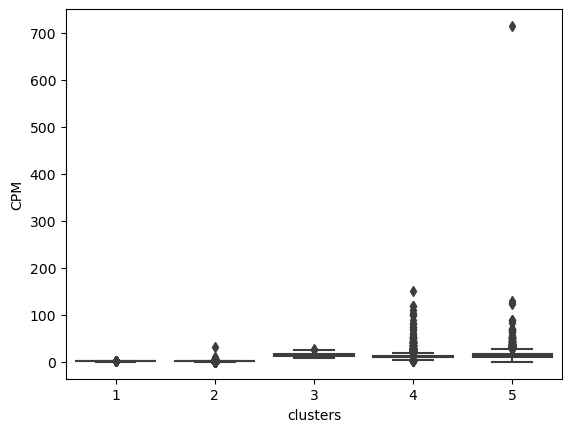

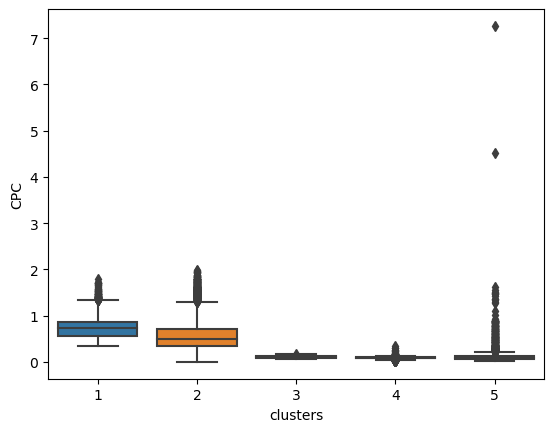

In [182]:
visualise = df[['Clicks', 'Spend', 'Fee', 'Revenue','CTR', 'CPM', 'CPC']]

for col in visualise:
    sns.boxplot(x = "clusters", y = col, data = df)
    plt.show()

## Make Elbow plot (up to n=10) and identify optimum number of clusters for k-means algorithm.

In [226]:
wss=[]

In [227]:
for i in range(1,11):
    KM = KMeans(n_clusters=i, n_init=10)
    KM.fit(df_num_scaled)
    wss.append(KM.inertia_)

In [228]:
wss

[299857.99999999994,
 190314.0756526771,
 130836.50109119201,
 93328.47237282965,
 58429.24504196264,
 44913.564048384476,
 41416.673056804226,
 35704.81469079199,
 33081.881861955124,
 30574.800585570243]

optimum number of clusters for k-means algorithm is 5 

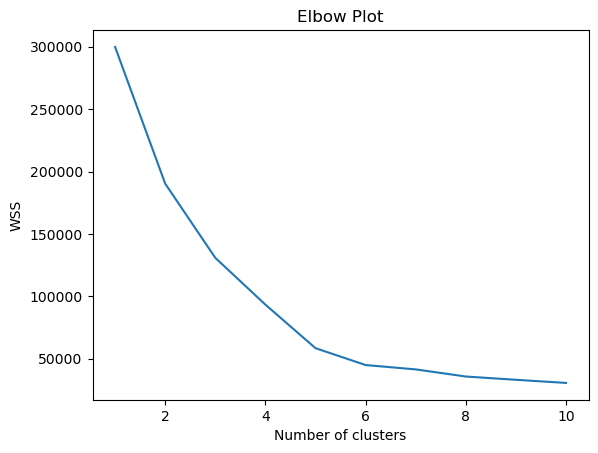

In [230]:
plt.plot(range(1,11), wss)
plt.title('Elbow Plot')
plt.xlabel('Number of clusters')
plt.ylabel('WSS')
plt.show()

In [240]:
k_means = KMeans(n_clusters = 5)
k_means.fit(df_num_scaled)
labels = k_means.labels_

C:\Users\u411715\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [241]:
df["Clus_kmeans"] = labels
df.head(5)

,Timestamp,InventoryType,Ad - Length,Ad- Width,Ad Size,Ad Type,Platform,Device Type,Format,Available_Impressions,...,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC,clusters,Clus_kmeans
0,2020-9-2-17,Format1,300,250,75000,Inter222,Video,Desktop,Display,1806,...,323,1,0.0,0.35,0.0,0.309598,0.0,0.0,2,1
1,2020-9-2-10,Format1,300,250,75000,Inter227,App,Mobile,Video,1780,...,285,1,0.0,0.35,0.0,0.350877,0.0,0.0,2,1
2,2020-9-1-22,Format1,300,250,75000,Inter222,Video,Desktop,Display,2727,...,355,1,0.0,0.35,0.0,0.281690,0.0,0.0,2,1
3,2020-9-3-20,Format1,300,250,75000,Inter228,Video,Mobile,Video,2430,...,495,1,0.0,0.35,0.0,0.202020,0.0,0.0,2,1
4,2020-9-4-15,Format1,300,250,75000,Inter217,Web,Desktop,Video,1218,...,242,1,0.0,0.35,0.0,0.413223,0.0,0.0,2,1


## Print silhouette scores for up to 10 clusters and identify optimum number of clusters.

In [231]:
from sklearn.metrics import silhouette_samples, silhouette_score

C:\Users\u411715\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\u411715\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\u411715\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\u411715\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of

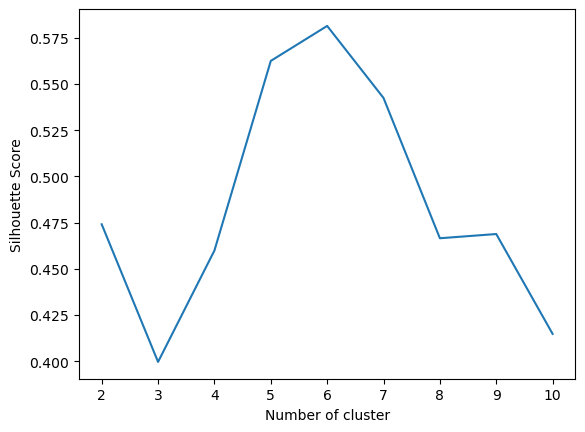

In [237]:

sc = {}


for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(df_num_scaled)
    labels = kmeans.predict(df_num_scaled)
    sc[k] = silhouette_score(df_num_scaled, labels)


plt.figure()
plt.plot(list(sc.keys()), list(sc.values()))
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette Score")
plt.show()

In [239]:
for i in range(2,11):
    print(f'The silhouette scores for {i:.0f} is {sc[i]}')

The silhouette scores for 2 is 0.47408614007079075
The silhouette scores for 3 is 0.3996085499898667
The silhouette scores for 4 is 0.4598885200834244
The silhouette scores for 5 is 0.5624992189264133
The silhouette scores for 6 is 0.5814351008554612
The silhouette scores for 7 is 0.5424544472408298
The silhouette scores for 8 is 0.46653628830971466
The silhouette scores for 9 is 0.4688187168141927
The silhouette scores for 10 is 0.4147804025269941


The optimum number of cluster based on the silhouette scores is 5.

In [100]:
k_means = KMeans(n_clusters = 6)
k_means.fit(df_num_scaled)
labels = k_means.labels_

NameError: name 'df_num_scaled' is not defined

In [257]:
df

,Timestamp,InventoryType,Ad - Length,Ad- Width,Ad Size,Ad Type,Platform,Device Type,Format,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC,Clus_kmeans
0,2020-9-2-17,Format1,300,250,75000,Inter222,Video,Desktop,Display,1806,325,323,1,0.00,0.35,0.0000,0.0031,0.0,0.0,3
1,2020-9-2-10,Format1,300,250,75000,Inter227,App,Mobile,Video,1780,285,285,1,0.00,0.35,0.0000,0.0035,0.0,0.0,3
2,2020-9-1-22,Format1,300,250,75000,Inter222,Video,Desktop,Display,2727,356,355,1,0.00,0.35,0.0000,0.0028,0.0,0.0,3
3,2020-9-3-20,Format1,300,250,75000,Inter228,Video,Mobile,Video,2430,497,495,1,0.00,0.35,0.0000,0.0020,0.0,0.0,3
4,2020-9-4-15,Format1,300,250,75000,Inter217,Web,Desktop,Video,1218,242,242,1,0.00,0.35,0.0000,0.0041,0.0,0.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23061,2020-9-13-7,Format5,720,300,216000,Inter220,Web,Mobile,Video,1,1,1,1,0.07,0.35,0.0455,NaN,NaN,NaN,0
23062,2020-11-2-7,Format5,720,300,216000,Inter224,Web,Desktop,Video,3,2,2,1,0.04,0.35,0.0260,NaN,NaN,NaN,0
23063,2020-9-14-22,Format5,720,300,216000,Inter218,App,Mobile,Video,2,1,1,1,0.05,0.35,0.0325,NaN,NaN,NaN,0
23064,2020-11-18-2,Format4,120,600,72000,inter230,Video,Mobile,Video,7,1,1,1,0.07,0.35,0.0455,NaN,NaN,NaN,1


In [258]:
df["Clus_kmeans_silhouette"] = labels
df.head(5)

,Timestamp,InventoryType,Ad - Length,Ad- Width,Ad Size,Ad Type,Platform,Device Type,Format,Available_Impressions,...,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC,Clus_kmeans,Clus_kmeans_silhouette
0,2020-9-2-17,Format1,300,250,75000,Inter222,Video,Desktop,Display,1806,...,323,1,0.0,0.35,0.0,0.0031,0.0,0.0,3,3
1,2020-9-2-10,Format1,300,250,75000,Inter227,App,Mobile,Video,1780,...,285,1,0.0,0.35,0.0,0.0035,0.0,0.0,3,3
2,2020-9-1-22,Format1,300,250,75000,Inter222,Video,Desktop,Display,2727,...,355,1,0.0,0.35,0.0,0.0028,0.0,0.0,3,3
3,2020-9-3-20,Format1,300,250,75000,Inter228,Video,Mobile,Video,2430,...,495,1,0.0,0.35,0.0,0.0020,0.0,0.0,3,3
4,2020-9-4-15,Format1,300,250,75000,Inter217,Web,Desktop,Video,1218,...,242,1,0.0,0.35,0.0,0.0041,0.0,0.0,3,3


## Profile the ads based on optimum number of clusters using silhouette score and your domain understanding
[Hint: Group the data by clusters and take sum or mean to identify trends in clicks, spend, revenue, CPM, CTR, & CPC based on Device Type. Make bar plots.]

In [259]:
df.Clus_kmeans_silhouette.value_counts()

Clus_kmeans_silhouette
3    7023
1    6878
0    4449
2    1760
4    1523
5    1433
Name: count, dtype: int64

In [260]:
df.columns

Index(['Timestamp', 'InventoryType', 'Ad - Length', 'Ad- Width', 'Ad Size',
       'Ad Type', 'Platform', 'Device Type', 'Format', 'Available_Impressions',
       'Matched_Queries', 'Impressions', 'Clicks', 'Spend', 'Fee', 'Revenue',
       'CTR', 'CPM', 'CPC', 'Clus_kmeans', 'Clus_kmeans_silhouette'],
      dtype='object')

In [98]:
df1=df.copy()
df1.columns


Index(['Timestamp', 'InventoryType', 'Ad - Length', 'Ad- Width', 'Ad Size',
       'Ad Type', 'Platform', 'Device Type', 'Format', 'Available_Impressions',
       'Matched_Queries', 'Impressions', 'Clicks', 'Spend', 'Fee', 'Revenue',
       'CTR', 'CPM', 'CPC'],
      dtype='object')

In [270]:
df1_num = df1.select_dtypes(include = ['float64', 'int64'])
df1_num["Clus_kmeans_silhouette"] = labels
df1_num.columns

Index(['Ad - Length', 'Ad- Width', 'Ad Size', 'Available_Impressions',
       'Matched_Queries', 'Impressions', 'Clicks', 'Spend', 'Fee', 'Revenue',
       'CTR', 'CPM', 'CPC', 'Clus_kmeans_silhouette'],
      dtype='object')

In [271]:
df1_num.groupby('Clus_kmeans_silhouette').mean()

,Ad - Length,Ad- Width,Ad Size,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
Clus_kmeans_silhouette,,,,,,,,,,,,,
0,700.941335,312.665768,214076.871207,2.713561e+05,1.441406e+05,1.232705e+05,14066.402338,1230.121594,0.349541,801.128873,0.123159,11.056677,0.093420
1,150.357662,558.272754,76194.242512,4.658062e+04,2.865184e+04,2.123888e+04,2942.664874,318.429927,0.349671,208.158449,0.145048,13.825529,0.105430
2,317.215909,254.164773,78335.590909,6.583391e+06,3.680953e+06,3.600777e+06,8540.592045,4869.576307,0.318102,3328.287738,0.002361,1.373273,0.596013
3,417.569700,159.122882,56996.548484,2.069062e+06,1.019823e+06,9.802289e+05,3452.573686,1762.449009,0.346966,1157.354292,0.003915,1.792989,0.575227
4,680.816809,117.997374,70171.950098,1.788804e+07,9.551272e+06,9.196415e+06,17427.061064,15398.915089,0.239278,11781.637728,0.001882,1.699359,0.912726
5,142.182833,571.179344,75625.959525,8.434057e+05,5.911566e+05,4.987601e+05,68157.265178,7234.734655,0.285262,5205.546564,0.138063,14.933278,0.108147


<Axes: xlabel='Clus_kmeans_silhouette', ylabel='Clicks'>

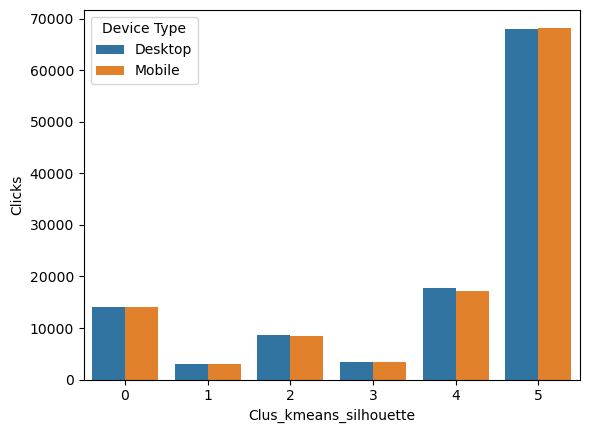

In [262]:
df1 = df1.groupby(['Clus_kmeans_silhouette', 'Device Type']).agg(Clicks=("Clicks", 'mean'))
df1 = df1.reset_index()

# plot barplot
sns.barplot(x="Clus_kmeans_silhouette",
           y="Clicks",
           hue="Device Type",
           data=df1)

<Axes: xlabel='Device Type', ylabel='Clicks'>

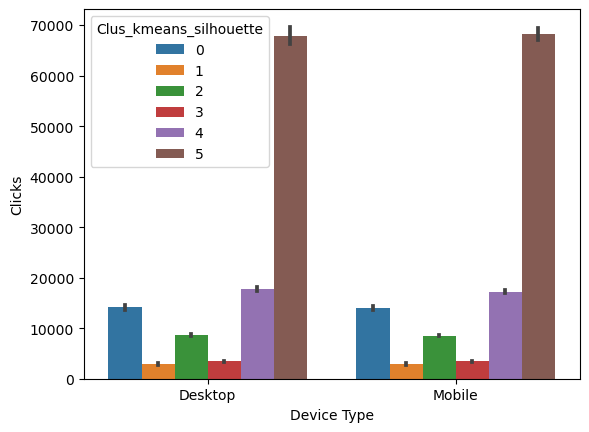

In [274]:
# plot barplot
sns.barplot(x="Device Type",
           y="Clicks",
           hue="Clus_kmeans_silhouette",
           data=df1)

<Axes: xlabel='Device Type', ylabel='Revenue'>

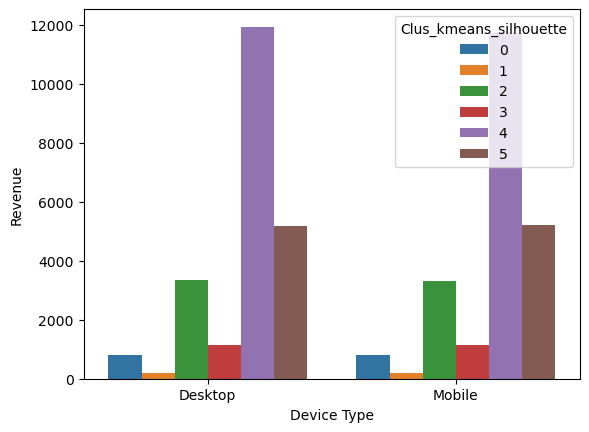

In [276]:
df1 = df1.groupby(['Clus_kmeans_silhouette', 'Device Type']).agg(Revenue=("Revenue", 'mean'))
df1 = df1.reset_index()
# plot barplot
sns.barplot(x="Device Type",
           y="Revenue",
           hue="Clus_kmeans_silhouette",
           data=df1)

In [281]:
df2=df.copy()
df2.columns

Index(['Timestamp', 'InventoryType', 'Ad - Length', 'Ad- Width', 'Ad Size',
       'Ad Type', 'Platform', 'Device Type', 'Format', 'Available_Impressions',
       'Matched_Queries', 'Impressions', 'Clicks', 'Spend', 'Fee', 'Revenue',
       'CTR', 'CPM', 'CPC', 'Clus_kmeans', 'Clus_kmeans_silhouette'],
      dtype='object')

<Axes: xlabel='Device Type', ylabel='CPC'>

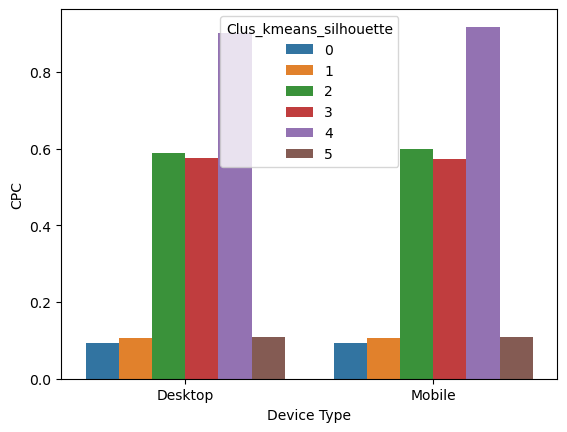

In [282]:
df2 = df2.groupby(['Clus_kmeans_silhouette', 'Device Type']).agg(CPC=("CPC", 'mean'))
df2 = df2.reset_index()
# plot barplot
sns.barplot(x="Device Type",
           y="CPC",
           hue="Clus_kmeans_silhouette",
           data=df2)

In [283]:
df3=df.copy()
df3.columns

Index(['Timestamp', 'InventoryType', 'Ad - Length', 'Ad- Width', 'Ad Size',
       'Ad Type', 'Platform', 'Device Type', 'Format', 'Available_Impressions',
       'Matched_Queries', 'Impressions', 'Clicks', 'Spend', 'Fee', 'Revenue',
       'CTR', 'CPM', 'CPC', 'Clus_kmeans', 'Clus_kmeans_silhouette'],
      dtype='object')

<Axes: xlabel='Device Type', ylabel='CPM'>

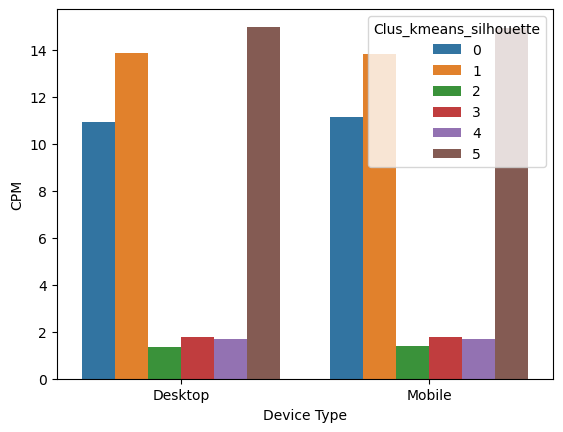

In [284]:
df3 = df3.groupby(['Clus_kmeans_silhouette', 'Device Type']).agg(CPM=("CPM", 'mean'))
df3 = df3.reset_index()
# plot barplot
sns.barplot(x="Device Type",
           y="CPM",
           hue="Clus_kmeans_silhouette",
           data=df3)

In [285]:
df4=df.copy()
df4.columns

Index(['Timestamp', 'InventoryType', 'Ad - Length', 'Ad- Width', 'Ad Size',
       'Ad Type', 'Platform', 'Device Type', 'Format', 'Available_Impressions',
       'Matched_Queries', 'Impressions', 'Clicks', 'Spend', 'Fee', 'Revenue',
       'CTR', 'CPM', 'CPC', 'Clus_kmeans', 'Clus_kmeans_silhouette'],
      dtype='object')

<Axes: xlabel='Device Type', ylabel='CPC'>

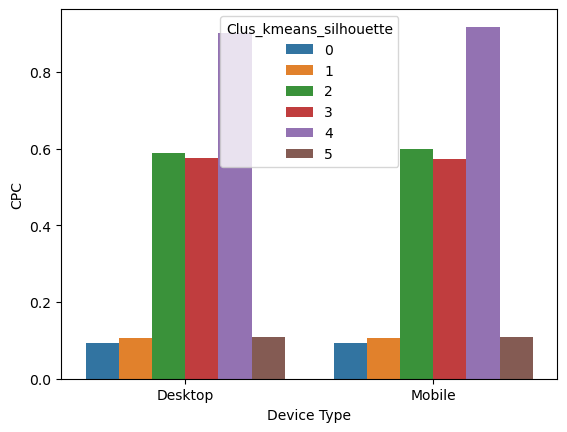

In [286]:
df4 = df4.groupby(['Clus_kmeans_silhouette', 'Device Type']).agg(CPC=("CPC", 'mean'))
df4 = df4.reset_index()
# plot barplot
sns.barplot(x="Device Type",
           y="CPC",
           hue="Clus_kmeans_silhouette",
           data=df4)

### Observations:

Clicks	It is a marketing metric that counts the number of times users have clicked on the particular advertisement to reach an online property.

Impressions	The impression count of the particular Advertisement out of the total available impressions. 

CTR stands for "Click through rate". CTR is the number of clicks that your ad receives divided by the number of times your ad is shown. Formula used here is CTR = Total Measured Clicks / Total Measured Ad Impressions x 100. Note that the Total Measured Clicks refers to the 'Clicks' Column and the Total Measured Ad Impressions refers to the 'Impressions' Column. 

CPM stands for "cost per 1000 impressions." Formula used here is CPM = (Total Campaign Spend / Number of Impressions) * 1,000. Note that the Total Campaign Spend refers to the 'Spend' Column and the Number of Impressions refers to the 'Impressions' Column. 

CPC	 stands for "Cost-per-click". Cost-per-click (CPC) bidding means that you pay for each click on your ads. The Formula used here is CPC = Total Cost (spend) / Number of Clicks. Note that the Total Cost (spend) refers to the 'Spend' Column and the Number of Clicks refers to the 'Clicks' Column. 

#### From the above k-means silhouette scores:

we can say that most of the advertisement cluster falls on the cluster 3 , followed by cluster 1, cluster 0 , cluster 2, cluster 4 and cluster 5.

The cost per click (CPC) for cluster 5 is high.
The cost per 1000 impressions (CPM) for cluster 5 is high.
The click through rate  (CTR) for cluster 1 is high.

The cluster 5 has highest number of clicks that counts the number of times users have clicked on the particular advertisement to reach an online property done by both desktop and mobile device.

The cluster 4 has achieved the highest number of revenue using both the device type ( mobile & desktop), followed by cluster 5, cluster 2, cluster 3, cluster 0, cluster 1.

Cluster 3 has minimum ad size when compared to other clusters.

The average CPM (cost per 1000 impressions) is highest in cluster 0, cluster 1 and cluster 5 which means the ads are displayed by spending huge amount to gain impression on users.

The Average CPC (Cost-per-click) is high for cluster 2, cluster 3 and cluster 4, due to this it has highest impression count of the particular Advertisement out of the total available impressions.   

Lower the CPM higher the revenue generated. 

The Digital Marketing company should focus on ads based on CPM which yeilds revenue by increasing the number of impressions on the ads rather than going for CPC. 


PCA:

PCA FH (FT): Primary census abstract for female headed households excluding institutional households (India & States/UTs - District Level), Scheduled tribes - 2011 PCA for Female Headed Household Excluding Institutional Household. The Indian Census has the reputation of being one of the best in the world. The first Census in India was conducted in the year 1872. This was conducted at different points of time in different parts of the country. In 1881 a Census was taken for the entire country simultaneously. Since then, Census has been conducted every ten years, without a break. Thus, the Census of India 2011 was the fifteenth in this unbroken series since 1872, the seventh after independence and the second census of the third millennium and twenty first century. The census has been uninterruptedly continued despite of several adversities like wars, epidemics, natural calamities, political unrest, etc. The Census of India is conducted under the provisions of the Census Act 1948 and the Census Rules, 1990. The Primary Census Abstract which is important publication of 2011 Census gives basic information on Area, Total Number of Households, Total Population, Scheduled Castes, Scheduled Tribes Population, Population in the age group 0-6, Literates, Main Workers and Marginal Workers classified by the four broad industrial categories, namely, (i) Cultivators, (ii) Agricultural Laborers, (iii) Household Industry Workers, and (iv) Other Workers and also Non-Workers. The characteristics of the Total Population include Scheduled Castes, Scheduled Tribes, Institutional and Houseless Population and are presented by sex and rural-urban residence. Census 2011 covered 35 States/Union Territories, 640 districts, 5,924 sub-districts, 7,935 Towns and 6,40,867 Villages.
The data collected has so many variables thus making it difficult to find useful details without using Data Science Techniques. You are tasked to perform detailed EDA and identify Optimum Principal Components that explains the most variance in data. Use Sklearn only.

In [5]:
p1 = pd.read_excel('PCA+India+Data_Census.xlsx')

In [6]:
p1.head()

,State Code,Dist.Code,State,Area Name,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
0,1,1,Jammu & Kashmir,Kupwara,7707,23388,29796,5862,6196,3,...,1150,749,180,237,680,252,32,46,258,214
1,1,2,Jammu & Kashmir,Badgam,6218,19585,23102,4482,3733,7,...,525,715,123,229,186,148,76,178,140,160
2,1,3,Jammu & Kashmir,Leh(Ladakh),4452,6546,10964,1082,1018,3,...,114,188,44,89,3,34,0,4,67,61
3,1,4,Jammu & Kashmir,Kargil,1320,2784,4206,563,677,0,...,194,247,61,128,13,50,4,10,116,59
4,1,5,Jammu & Kashmir,Punch,11654,20591,29981,5157,4587,20,...,874,1928,465,1043,205,302,24,105,180,478


In [7]:
p1.tail()

,State Code,Dist.Code,State,Area Name,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
635,34,636,Puducherry,Mahe,3333,8154,11781,1146,1203,21,...,32,47,0,0,0,0,0,0,32,47
636,34,637,Puducherry,Karaikal,10612,12346,21691,1544,1533,2234,...,155,337,3,14,38,130,4,23,110,170
637,35,638,Andaman & Nicobar Island,Nicobars,1275,1549,2630,227,225,0,...,104,134,9,4,2,6,17,47,76,77
638,35,639,Andaman & Nicobar Island,North & Middle Andaman,3762,5200,8012,723,664,0,...,136,172,24,44,11,21,1,4,100,103
639,35,640,Andaman & Nicobar Island,South Andaman,7975,11977,18049,1470,1358,0,...,173,122,6,2,17,17,2,4,148,99


In [8]:
p1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 61 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   State Code      640 non-null    int64 
 1   Dist.Code       640 non-null    int64 
 2   State           640 non-null    object
 3   Area Name       640 non-null    object
 4   No_HH           640 non-null    int64 
 5   TOT_M           640 non-null    int64 
 6   TOT_F           640 non-null    int64 
 7   M_06            640 non-null    int64 
 8   F_06            640 non-null    int64 
 9   M_SC            640 non-null    int64 
 10  F_SC            640 non-null    int64 
 11  M_ST            640 non-null    int64 
 12  F_ST            640 non-null    int64 
 13  M_LIT           640 non-null    int64 
 14  F_LIT           640 non-null    int64 
 15  M_ILL           640 non-null    int64 
 16  F_ILL           640 non-null    int64 
 17  TOT_WORK_M      640 non-null    int64 
 18  TOT_WORK_F

In [9]:
p1.describe().T

,count,mean,std,min,25%,50%,75%,max
State Code,640.0,17.114062,9.426486,1.0,9.00,18.0,24.00,35.0
Dist.Code,640.0,320.500000,184.896367,1.0,160.75,320.5,480.25,640.0
No_HH,640.0,51222.871875,48135.405475,350.0,19484.00,35837.0,68892.00,310450.0
TOT_M,640.0,79940.576563,73384.511114,391.0,30228.00,58339.0,107918.50,485417.0
TOT_F,640.0,122372.084375,113600.717282,698.0,46517.75,87724.5,164251.75,750392.0
M_06,640.0,12309.098438,11500.906881,56.0,4733.75,9159.0,16520.25,96223.0
F_06,640.0,11942.300000,11326.294567,56.0,4672.25,8663.0,15902.25,95129.0
M_SC,640.0,13820.946875,14426.373130,0.0,3466.25,9591.5,19429.75,103307.0
F_SC,640.0,20778.392188,21727.887713,0.0,5603.25,13709.0,29180.00,156429.0
M_ST,640.0,6191.807813,9912.668948,0.0,293.75,2333.5,7658.00,96785.0


In [10]:
 #checking the duplicate values in the dataset
p1.duplicated().sum()

0

In [11]:
 #checking the null values in the dataset
p1.isnull().sum()

State Code       0
Dist.Code        0
State            0
Area Name        0
No_HH            0
                ..
MARG_HH_0_3_F    0
MARG_OT_0_3_M    0
MARG_OT_0_3_F    0
NON_WORK_M       0
NON_WORK_F       0
Length: 61, dtype: int64

(i) Which state has highest gender ratio and which has the lowest?

In [16]:
# Group the DataFrame by the 'State' column and sum the values of the 'TOT_M' and 'TOT_F' columns.
g = p1.groupby('State')[['TOT_M', 'TOT_F']].sum()

In [17]:
gender_ratio=g['TOT_F']/(g['TOT_M'])
gender_ratio.sort_values(ascending=False)


State
Andhra Pradesh              1.862113
Tamil Nadu                  1.825079
Chhattisgarh                1.820831
Arunachal Pradesh           1.741054
Odisha                      1.737621
Nagaland                    1.713262
Maharashtra                 1.701224
Puducherry                  1.691728
Kerala                      1.663236
Goa                         1.608628
Mizoram                     1.603504
Tripura                     1.597749
Uttarakhand                 1.585126
Karnataka                   1.567885
Madhya Pradesh              1.563246
Manipur                     1.559626
Sikkim                      1.557081
Himachal Pradesh            1.555837
Dadara & Nagar Havelli      1.551275
West Bengal                 1.537645
Andaman & Nicobar Island    1.532148
Gujarat                     1.481824
Jharkhand                   1.466697
Assam                       1.456536
Rajasthan                   1.438257
Chandigarh                  1.428496
Daman & Diu                 1.42

In [18]:
print("State with the highest gender ratio:", gender_ratio.sort_values(ascending=False).index[0])
print("State with the lowest gender ratio:", gender_ratio.sort_values().index[0])

State with the highest gender ratio: Andhra Pradesh
State with the lowest gender ratio: Lakshadweep


(ii) Which district has the highest & lowest gender ratio?

In [19]:
g1 = p1.groupby('Area Name')[['TOT_M', 'TOT_F']].sum()

In [20]:
gender_ratio1=g1['TOT_F']/(g1['TOT_M'])
gender_ratio1.sort_values(ascending=False)

Area Name
Krishna           2.283250
Koraput           2.268763
Virudhunagar      2.225429
West Godavari     2.221849
Baudh             2.215060
                    ...   
Baghpat           1.184830
Dhaulpur          1.180761
Mahamaya Nagar    1.180202
Badgam            1.179576
Lakshadweep       1.151993
Length: 635, dtype: float64

In [22]:
print("District with the highest gender ratio:", gender_ratio1.sort_values(ascending=False).index[0])
print("District with the lowest gender ratio:", gender_ratio1.sort_values().index[0])

District with the highest gender ratio: Krishna
District with the lowest gender ratio: Lakshadweep


Data Preprocessing

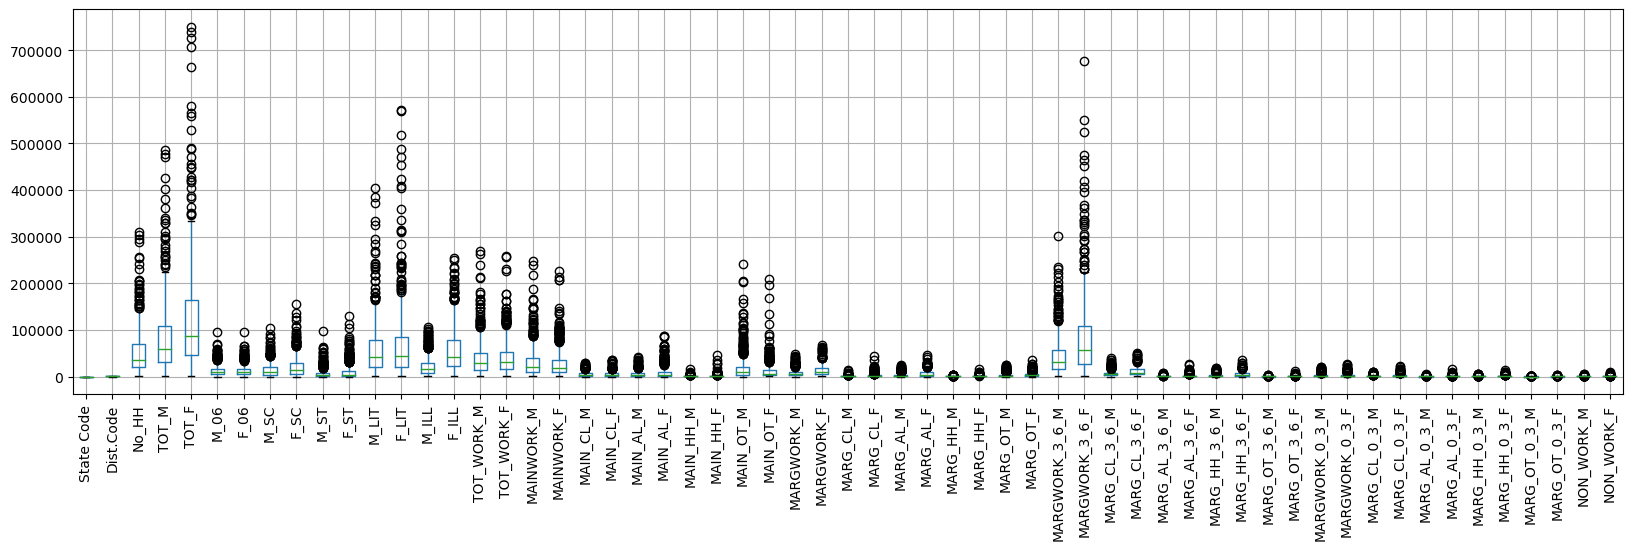

In [23]:
p1_num = p1.select_dtypes(include = ['float64', 'int64'])

p1_num.boxplot(figsize=(20,5))
plt.xticks(rotation=90)
plt.show()

True outliers are kpet for further analysis.

In [24]:
from scipy.stats import zscore
p1_num_scaled=p1_num.apply(zscore)
p1_num_scaled.head()

,State Code,Dist.Code,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,F_SC,M_ST,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
0,-1.710782,-1.729347,-0.904738,-0.771236,-0.815563,-0.561012,-0.507738,-0.958575,-0.957049,-0.423306,...,-0.163229,-0.720610,-0.156494,-0.287524,0.156577,-0.657412,-0.365258,-0.499977,-0.413053,-0.539614
1,-1.710782,-1.723934,-0.935695,-0.823100,-0.874534,-0.681096,-0.725367,-0.958297,-0.956772,-0.582014,...,-0.583103,-0.732811,-0.282327,-0.294688,-0.491731,-0.723062,0.042855,-0.073481,-0.606455,-0.598988
2,-1.710782,-1.718521,-0.972412,-1.000919,-0.981466,-0.976956,-0.965262,-0.958575,-0.956772,-0.038951,...,-0.859212,-0.921931,-0.456727,-0.420050,-0.731894,-0.795026,-0.662068,-0.635680,-0.726103,-0.707839
3,-1.710782,-1.713109,-1.037530,-1.052224,-1.041001,-1.022118,-0.995393,-0.958783,-0.957049,-0.355965,...,-0.805468,-0.900758,-0.419198,-0.385127,-0.718770,-0.784926,-0.624966,-0.616294,-0.645791,-0.710038
4,-1.710782,-1.707696,-0.822676,-0.809381,-0.813933,-0.622359,-0.649908,-0.957395,-0.955529,0.149238,...,-0.348645,-0.297513,0.472670,0.434200,-0.466796,-0.625849,-0.439461,-0.309346,-0.540895,-0.249344


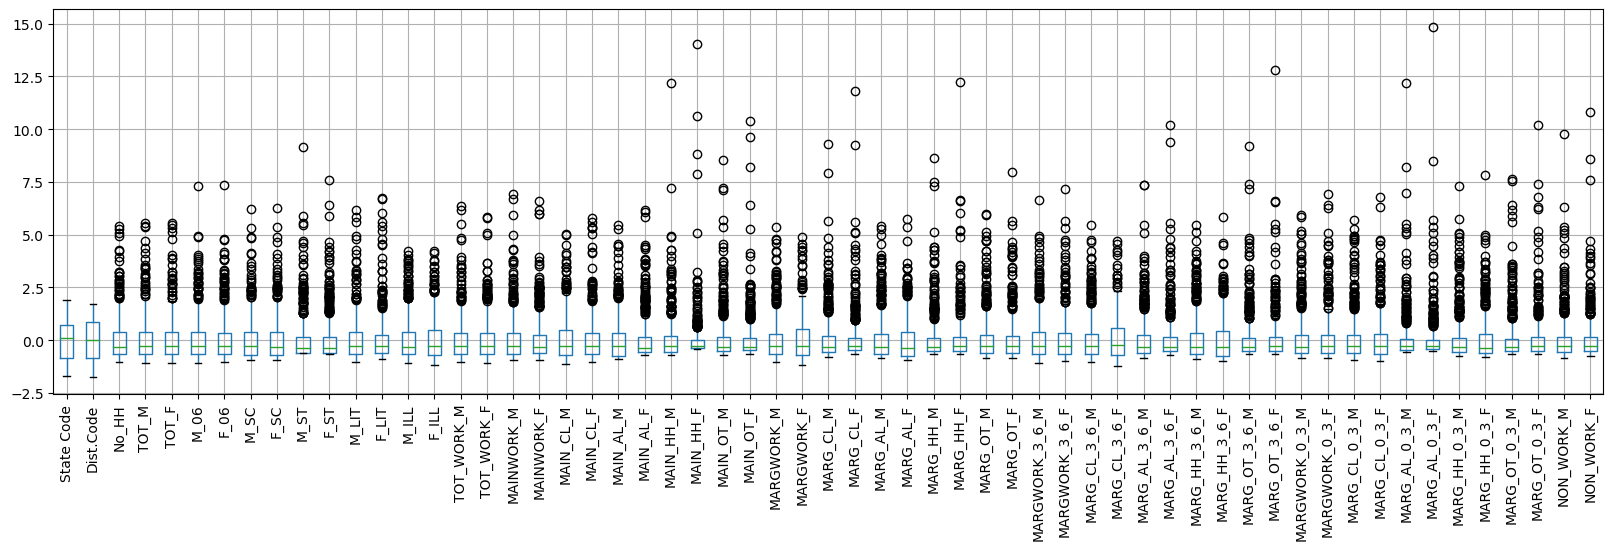

In [25]:
p1_num_scaled.boxplot(figsize=(20,5))
plt.xticks(rotation=90)
plt.show()

In [26]:
p1_num_scaled.columns

Index(['State Code', 'Dist.Code', 'No_HH', 'TOT_M', 'TOT_F', 'M_06', 'F_06',
       'M_SC', 'F_SC', 'M_ST', 'F_ST', 'M_LIT', 'F_LIT', 'M_ILL', 'F_ILL',
       'TOT_WORK_M', 'TOT_WORK_F', 'MAINWORK_M', 'MAINWORK_F', 'MAIN_CL_M',
       'MAIN_CL_F', 'MAIN_AL_M', 'MAIN_AL_F', 'MAIN_HH_M', 'MAIN_HH_F',
       'MAIN_OT_M', 'MAIN_OT_F', 'MARGWORK_M', 'MARGWORK_F', 'MARG_CL_M',
       'MARG_CL_F', 'MARG_AL_M', 'MARG_AL_F', 'MARG_HH_M', 'MARG_HH_F',
       'MARG_OT_M', 'MARG_OT_F', 'MARGWORK_3_6_M', 'MARGWORK_3_6_F',
       'MARG_CL_3_6_M', 'MARG_CL_3_6_F', 'MARG_AL_3_6_M', 'MARG_AL_3_6_F',
       'MARG_HH_3_6_M', 'MARG_HH_3_6_F', 'MARG_OT_3_6_M', 'MARG_OT_3_6_F',
       'MARGWORK_0_3_M', 'MARGWORK_0_3_F', 'MARG_CL_0_3_M', 'MARG_CL_0_3_F',
       'MARG_AL_0_3_M', 'MARG_AL_0_3_F', 'MARG_HH_0_3_M', 'MARG_HH_0_3_F',
       'MARG_OT_0_3_M', 'MARG_OT_0_3_F', 'NON_WORK_M', 'NON_WORK_F'],
      dtype='object')

In [27]:
p1_num_scaled=p1_num_scaled.drop(['State Code','Dist.Code'],axis=1)

In [38]:
p1_num_scaled.columns

Index(['No_HH', 'TOT_M', 'TOT_F', 'M_06', 'F_06', 'M_SC', 'F_SC', 'M_ST',
       'F_ST', 'M_LIT', 'F_LIT', 'M_ILL', 'F_ILL', 'TOT_WORK_M', 'TOT_WORK_F',
       'MAINWORK_M', 'MAINWORK_F', 'MAIN_CL_M', 'MAIN_CL_F', 'MAIN_AL_M',
       'MAIN_AL_F', 'MAIN_HH_M', 'MAIN_HH_F', 'MAIN_OT_M', 'MAIN_OT_F',
       'MARGWORK_M', 'MARGWORK_F', 'MARG_CL_M', 'MARG_CL_F', 'MARG_AL_M',
       'MARG_AL_F', 'MARG_HH_M', 'MARG_HH_F', 'MARG_OT_M', 'MARG_OT_F',
       'MARGWORK_3_6_M', 'MARGWORK_3_6_F', 'MARG_CL_3_6_M', 'MARG_CL_3_6_F',
       'MARG_AL_3_6_M', 'MARG_AL_3_6_F', 'MARG_HH_3_6_M', 'MARG_HH_3_6_F',
       'MARG_OT_3_6_M', 'MARG_OT_3_6_F', 'MARGWORK_0_3_M', 'MARGWORK_0_3_F',
       'MARG_CL_0_3_M', 'MARG_CL_0_3_F', 'MARG_AL_0_3_M', 'MARG_AL_0_3_F',
       'MARG_HH_0_3_M', 'MARG_HH_0_3_F', 'MARG_OT_0_3_M', 'MARG_OT_0_3_F',
       'NON_WORK_M', 'NON_WORK_F'],
      dtype='object')

In [34]:
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(p1_num_scaled)
p_value

0.0

In [35]:
# KMO Test The Kaiser-Meyer-Olkin (KMO) - measure of sampling adequacy (MSA) is an index used to examine how appropriate PCA is.
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(p1_num_scaled)
kmo_model

C:\Users\u411715\AppData\Local\anaconda3\Lib\site-packages\factor_analyzer\utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


0.8039889932779798

### Generally, if MSA is less than 0.5, PCA is not recommended, since no reduction is expected. On the other hand, MSA > 0.7 is expected to provide a considerable reduction is the dimension and extraction of meaningful components.

In [39]:
from sklearn.decomposition import PCA
pca = PCA(n_components=33, random_state=123)
df_pca = pca.fit_transform(p1_num_scaled)
df_pca.transpose().round(2)

array([[-4.62, -4.77, -5.96, ..., -6.29, -6.22, -5.9 ],
       [ 0.14, -0.11, -0.29, ..., -0.64, -0.67, -0.94],
       [ 0.33,  0.24,  0.37, ...,  0.11,  0.27,  0.35],
       ...,
       [ 0.21, -0.03, -0.01, ...,  0.  ,  0.02,  0.02],
       [ 0.06, -0.  , -0.02, ..., -0.02, -0.  , -0.  ],
       [ 0.02, -0.  , -0.03, ..., -0.02, -0.02, -0.01]])

In [40]:
#Step 1: Obtaining the Eigen Vectors when the Principal Components are kept exactly as the number of features in the scaled data
print('Eigen Vectors \n %s',pca.components_.round(2))

Eigen Vectors 
 %s [[ 0.16  0.17  0.17 ...  0.13  0.15  0.13]
 [-0.13 -0.09 -0.1  ...  0.05 -0.07 -0.07]
 [-0.    0.06  0.04 ... -0.08  0.11  0.1 ]
 ...
 [ 0.   -0.21  0.04 ... -0.21 -0.04  0.05]
 [-0.08  0.08  0.05 ...  0.09 -0.32  0.22]
 [ 0.64  0.03 -0.22 ... -0.01  0.01 -0.02]]


In [41]:
var_exp = pca.explained_variance_ratio_
print(var_exp.round(2))

[0.56 0.14 0.07 0.06 0.04 0.03 0.02 0.01 0.01 0.01 0.01 0.01 0.01 0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.  ]


In [42]:
# Step 2: Obtaining the Cumulative Sum of the Expalained Variance 
cum_var_exp = np.cumsum(var_exp)
print('Cumulative Variance Explained in Percentage:',(cum_var_exp*100).round(2))

Cumulative Variance Explained in Percentage: [ 55.73  69.51  76.79  83.21  87.08  90.47  92.53  93.85  94.93  95.85
  96.61  97.23  97.75  98.24  98.57  98.81  99.01  99.2   99.37  99.51
  99.61  99.69  99.75  99.81  99.85  99.89  99.92  99.94  99.96  99.97
  99.98  99.99 100.  ]


We can see above that more than 93% of the variance is explained by 8 Principal Components.
Around 98% of the variance is explained by 15 Principal Components.  For the scope of this project, take at least 90% explained variance.

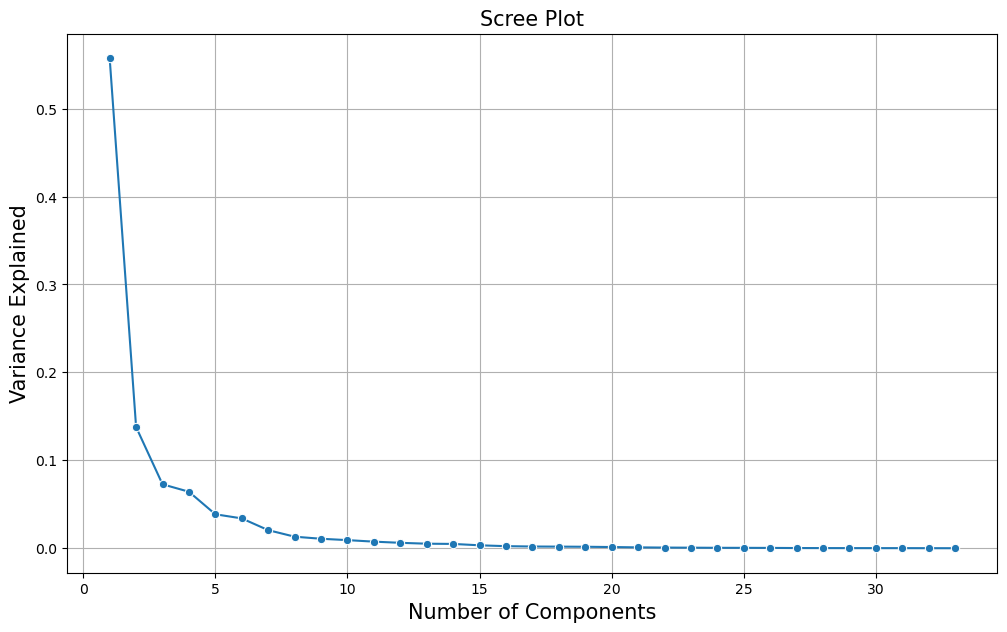

In [43]:
# Step 3 View Scree Plot to identify the number of components to be built
plt.figure(figsize=(12,7))
sns.lineplot(y=var_exp,x=range(1,len(var_exp)+1),marker='o')
plt.xlabel('Number of Components',fontsize=15)
plt.ylabel('Variance Explained',fontsize=15)
plt.title('Scree Plot',fontsize=15)
plt.grid()
plt.show()

The number of components can be decided based upon the explained variance. Here, it is decided to keep the number of components as 8 as the cumulative explained variance is around 93%

In [57]:
# Using scikit learn PCA here. It does all the above steps and maps data to PCA dimensions in one shot
from sklearn.decomposition import PCA
# NOTE - we are generating only 6 PCA dimensions (dimensionality reduction from 33 to 6)
pca = PCA(n_components=6, random_state=123)
df_pca = pca.fit_transform(p1_num_scaled)
df_pca.transpose().round(2) # Component output

array([[-4.62, -4.77, -5.96, ..., -6.29, -6.22, -5.9 ],
       [ 0.14, -0.11, -0.29, ..., -0.64, -0.67, -0.94],
       [ 0.33,  0.24,  0.37, ...,  0.11,  0.27,  0.35],
       [ 1.54,  1.96,  0.62, ...,  1.37,  1.14,  1.11],
       [ 0.35, -0.15,  0.48, ...,  0.15,  0.06,  0.15],
       [-0.42,  0.42,  0.28, ...,  0.14, -0.12, -0.15]])

In [58]:
pca.components_.round(2)#eigen vectors

array([[ 0.16,  0.17,  0.17,  0.16,  0.16,  0.15,  0.15,  0.03,  0.03,
         0.16,  0.15,  0.16,  0.17,  0.16,  0.15,  0.15,  0.12,  0.1 ,
         0.07,  0.11,  0.07,  0.13,  0.08,  0.12,  0.11,  0.16,  0.16,
         0.08,  0.05,  0.13,  0.11,  0.14,  0.13,  0.16,  0.15,  0.16,
         0.16,  0.17,  0.16,  0.09,  0.05,  0.13,  0.11,  0.14,  0.12,
         0.15,  0.15,  0.15,  0.14,  0.05,  0.04,  0.12,  0.12,  0.14,
         0.13,  0.15,  0.13],
       [-0.13, -0.09, -0.1 , -0.02, -0.02, -0.05, -0.05,  0.03,  0.03,
        -0.12, -0.15, -0.01, -0.01, -0.13, -0.09, -0.18, -0.15,  0.06,
         0.09, -0.03, -0.06, -0.08, -0.08, -0.21, -0.21,  0.09,  0.13,
         0.27,  0.25,  0.17,  0.14,  0.07,  0.02, -0.09, -0.12, -0.04,
        -0.11,  0.08,  0.1 ,  0.26,  0.24,  0.16,  0.13,  0.06,  0.01,
        -0.09, -0.13,  0.15,  0.18,  0.25,  0.24,  0.19,  0.18,  0.08,
         0.05, -0.07, -0.07],
       [-0.  ,  0.06,  0.04,  0.06,  0.05,  0.  , -0.03, -0.12, -0.14,
         0.08,  0

In [59]:
pca.explained_variance_#eigen values

array([31.81356474,  7.86942415,  4.15340812,  3.66879058,  2.20652588,
        1.93827502])

In [60]:
var_exp_1 = pca.explained_variance_ratio_.round(2)

In [61]:
pca.explained_variance_ratio_.round(2)

array([0.56, 0.14, 0.07, 0.06, 0.04, 0.03])

In [62]:
cum_var=np.cumsum(pca.explained_variance_ratio_)
cum_var

array([0.55726063, 0.69510499, 0.76785794, 0.83212212, 0.87077261,
       0.9047243 ])

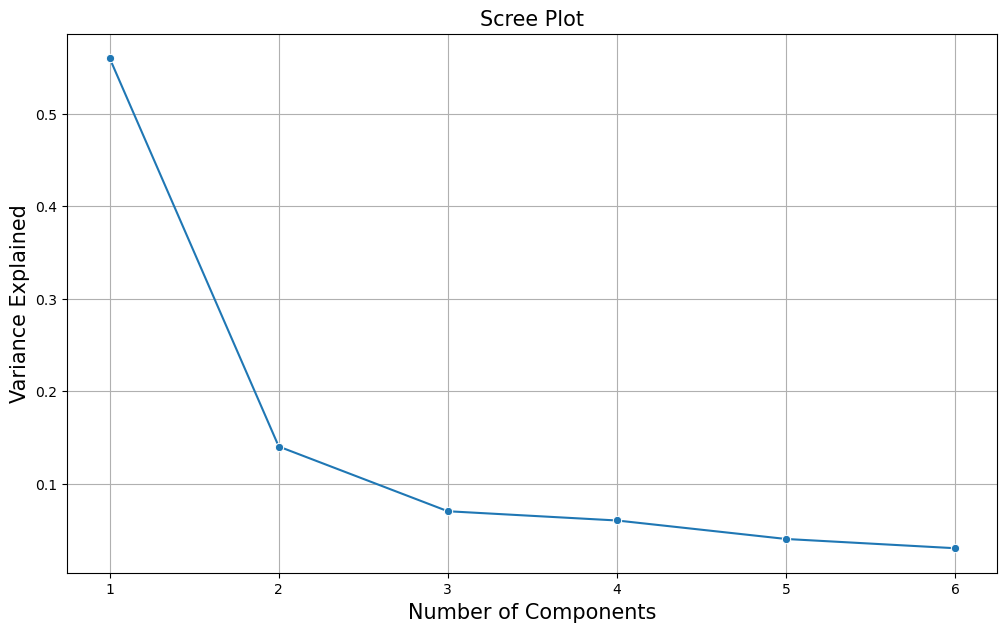

In [63]:

plt.figure(figsize=(12,7))
sns.lineplot(y=var_exp_1,x=range(1,len(var_exp_1)+1),marker='o')
plt.xlabel('Number of Components',fontsize=15)
plt.ylabel('Variance Explained',fontsize=15)
plt.title('Scree Plot',fontsize=15)
plt.grid()
plt.show()

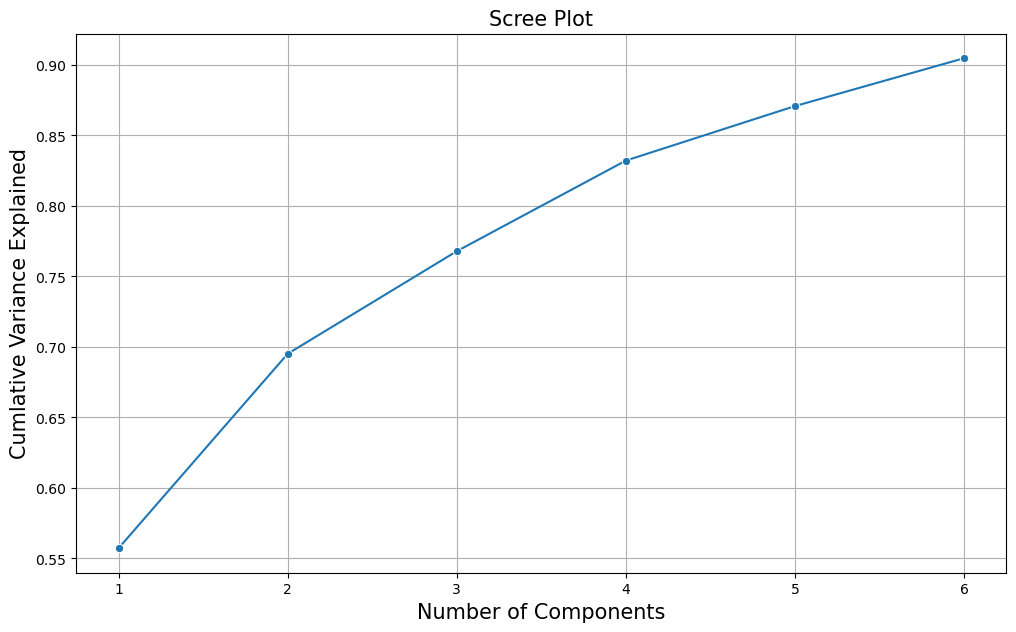

In [64]:
plt.figure(figsize=(12,7))
sns.lineplot(y=cum_var,x=range(1,len(cum_var)+1),marker='o')
plt.xlabel('Number of Components',fontsize=15)
plt.ylabel('Cumlative Variance Explained',fontsize=15)
plt.title('Scree Plot',fontsize=15)
plt.grid()
plt.show()
     

In [65]:
# Let's create a dataframe of component loading against each field and identify the pattern
p1_pca_loading = pd.DataFrame(pca.components_.round(2),columns=list(p1_num_scaled))
p1_pca_loading.shape

(6, 57)

In [66]:
p1_pca_loading.head(8)

,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,F_SC,M_ST,F_ST,M_LIT,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
0,0.16,0.17,0.17,0.16,0.16,0.15,0.15,0.03,0.03,0.16,...,0.15,0.14,0.05,0.04,0.12,0.12,0.14,0.13,0.15,0.13
1,-0.13,-0.09,-0.10,-0.02,-0.02,-0.05,-0.05,0.03,0.03,-0.12,...,0.15,0.18,0.25,0.24,0.19,0.18,0.08,0.05,-0.07,-0.07
2,-0.00,0.06,0.04,0.06,0.05,0.00,-0.03,-0.12,-0.14,0.08,...,0.05,0.02,0.27,0.28,-0.14,-0.20,-0.02,-0.08,0.11,0.10
3,-0.13,-0.02,-0.07,0.01,0.01,0.01,-0.03,-0.22,-0.23,-0.04,...,0.09,-0.02,-0.10,-0.14,0.13,0.00,0.23,0.21,0.08,0.02
4,-0.01,-0.03,-0.01,-0.05,-0.04,-0.17,-0.16,0.43,0.44,-0.01,...,0.08,0.13,-0.05,-0.05,0.06,0.13,-0.04,0.00,0.16,0.24
5,0.00,-0.07,-0.04,-0.16,-0.15,-0.06,-0.04,0.22,0.23,-0.06,...,-0.06,-0.00,0.07,0.08,-0.12,-0.11,0.06,0.30,-0.05,-0.02


In [67]:
p1_pca_loading.T

,0,1,2,3,4,5
No_HH,0.16,-0.13,-0.00,-0.13,-0.01,0.00
TOT_M,0.17,-0.09,0.06,-0.02,-0.03,-0.07
TOT_F,0.17,-0.10,0.04,-0.07,-0.01,-0.04
M_06,0.16,-0.02,0.06,0.01,-0.05,-0.16
F_06,0.16,-0.02,0.05,0.01,-0.04,-0.15
M_SC,0.15,-0.05,0.00,0.01,-0.17,-0.06
F_SC,0.15,-0.05,-0.03,-0.03,-0.16,-0.04
M_ST,0.03,0.03,-0.12,-0.22,0.43,0.22
F_ST,0.03,0.03,-0.14,-0.23,0.44,0.23
M_LIT,0.16,-0.12,0.08,-0.04,-0.01,-0.06


In [69]:
p1_extracted_loadings = pd.DataFrame(pca.components_.T,
                                     columns = ['PC1','PC2', 'PC3', 'PC4', 'PC5', 'PC6'],
                                    index = p1_num_scaled.columns)

In [70]:
p1_extracted_loadings

,PC1,PC2,PC3,PC4,PC5,PC6
No_HH,0.156021,-0.126347,-0.002690,-0.125293,-0.007022,0.004083
TOT_M,0.167118,-0.089677,0.056698,-0.019942,-0.033026,-0.073389
TOT_F,0.165553,-0.104912,0.038749,-0.070873,-0.012847,-0.043647
M_06,0.162193,-0.022095,0.057788,0.011917,-0.050248,-0.157957
F_06,0.162566,-0.020271,0.050126,0.014844,-0.043848,-0.154436
M_SC,0.151358,-0.045111,0.002569,0.012485,-0.173007,-0.064295
F_SC,0.151567,-0.051924,-0.025101,-0.029893,-0.159803,-0.040518
M_ST,0.027234,0.027679,-0.123504,-0.222247,0.433163,0.222591
F_ST,0.028183,0.030223,-0.139769,-0.229754,0.438792,0.225531
M_LIT,0.161993,-0.115355,0.082168,-0.035163,-0.009101,-0.055465


C:\Users\u411715\AppData\Local\Temp\ipykernel_24912\398250732.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\u411715\AppData\Local\Temp\ipykernel_24912\398250732.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\u411715\AppData\Local\Temp\ipykernel_24912\398250732.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\u411715\AppData\Local\Temp\ipykernel_24912\398250732.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\u411715\AppData\Local\Temp\ipykernel_24912\398250732.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


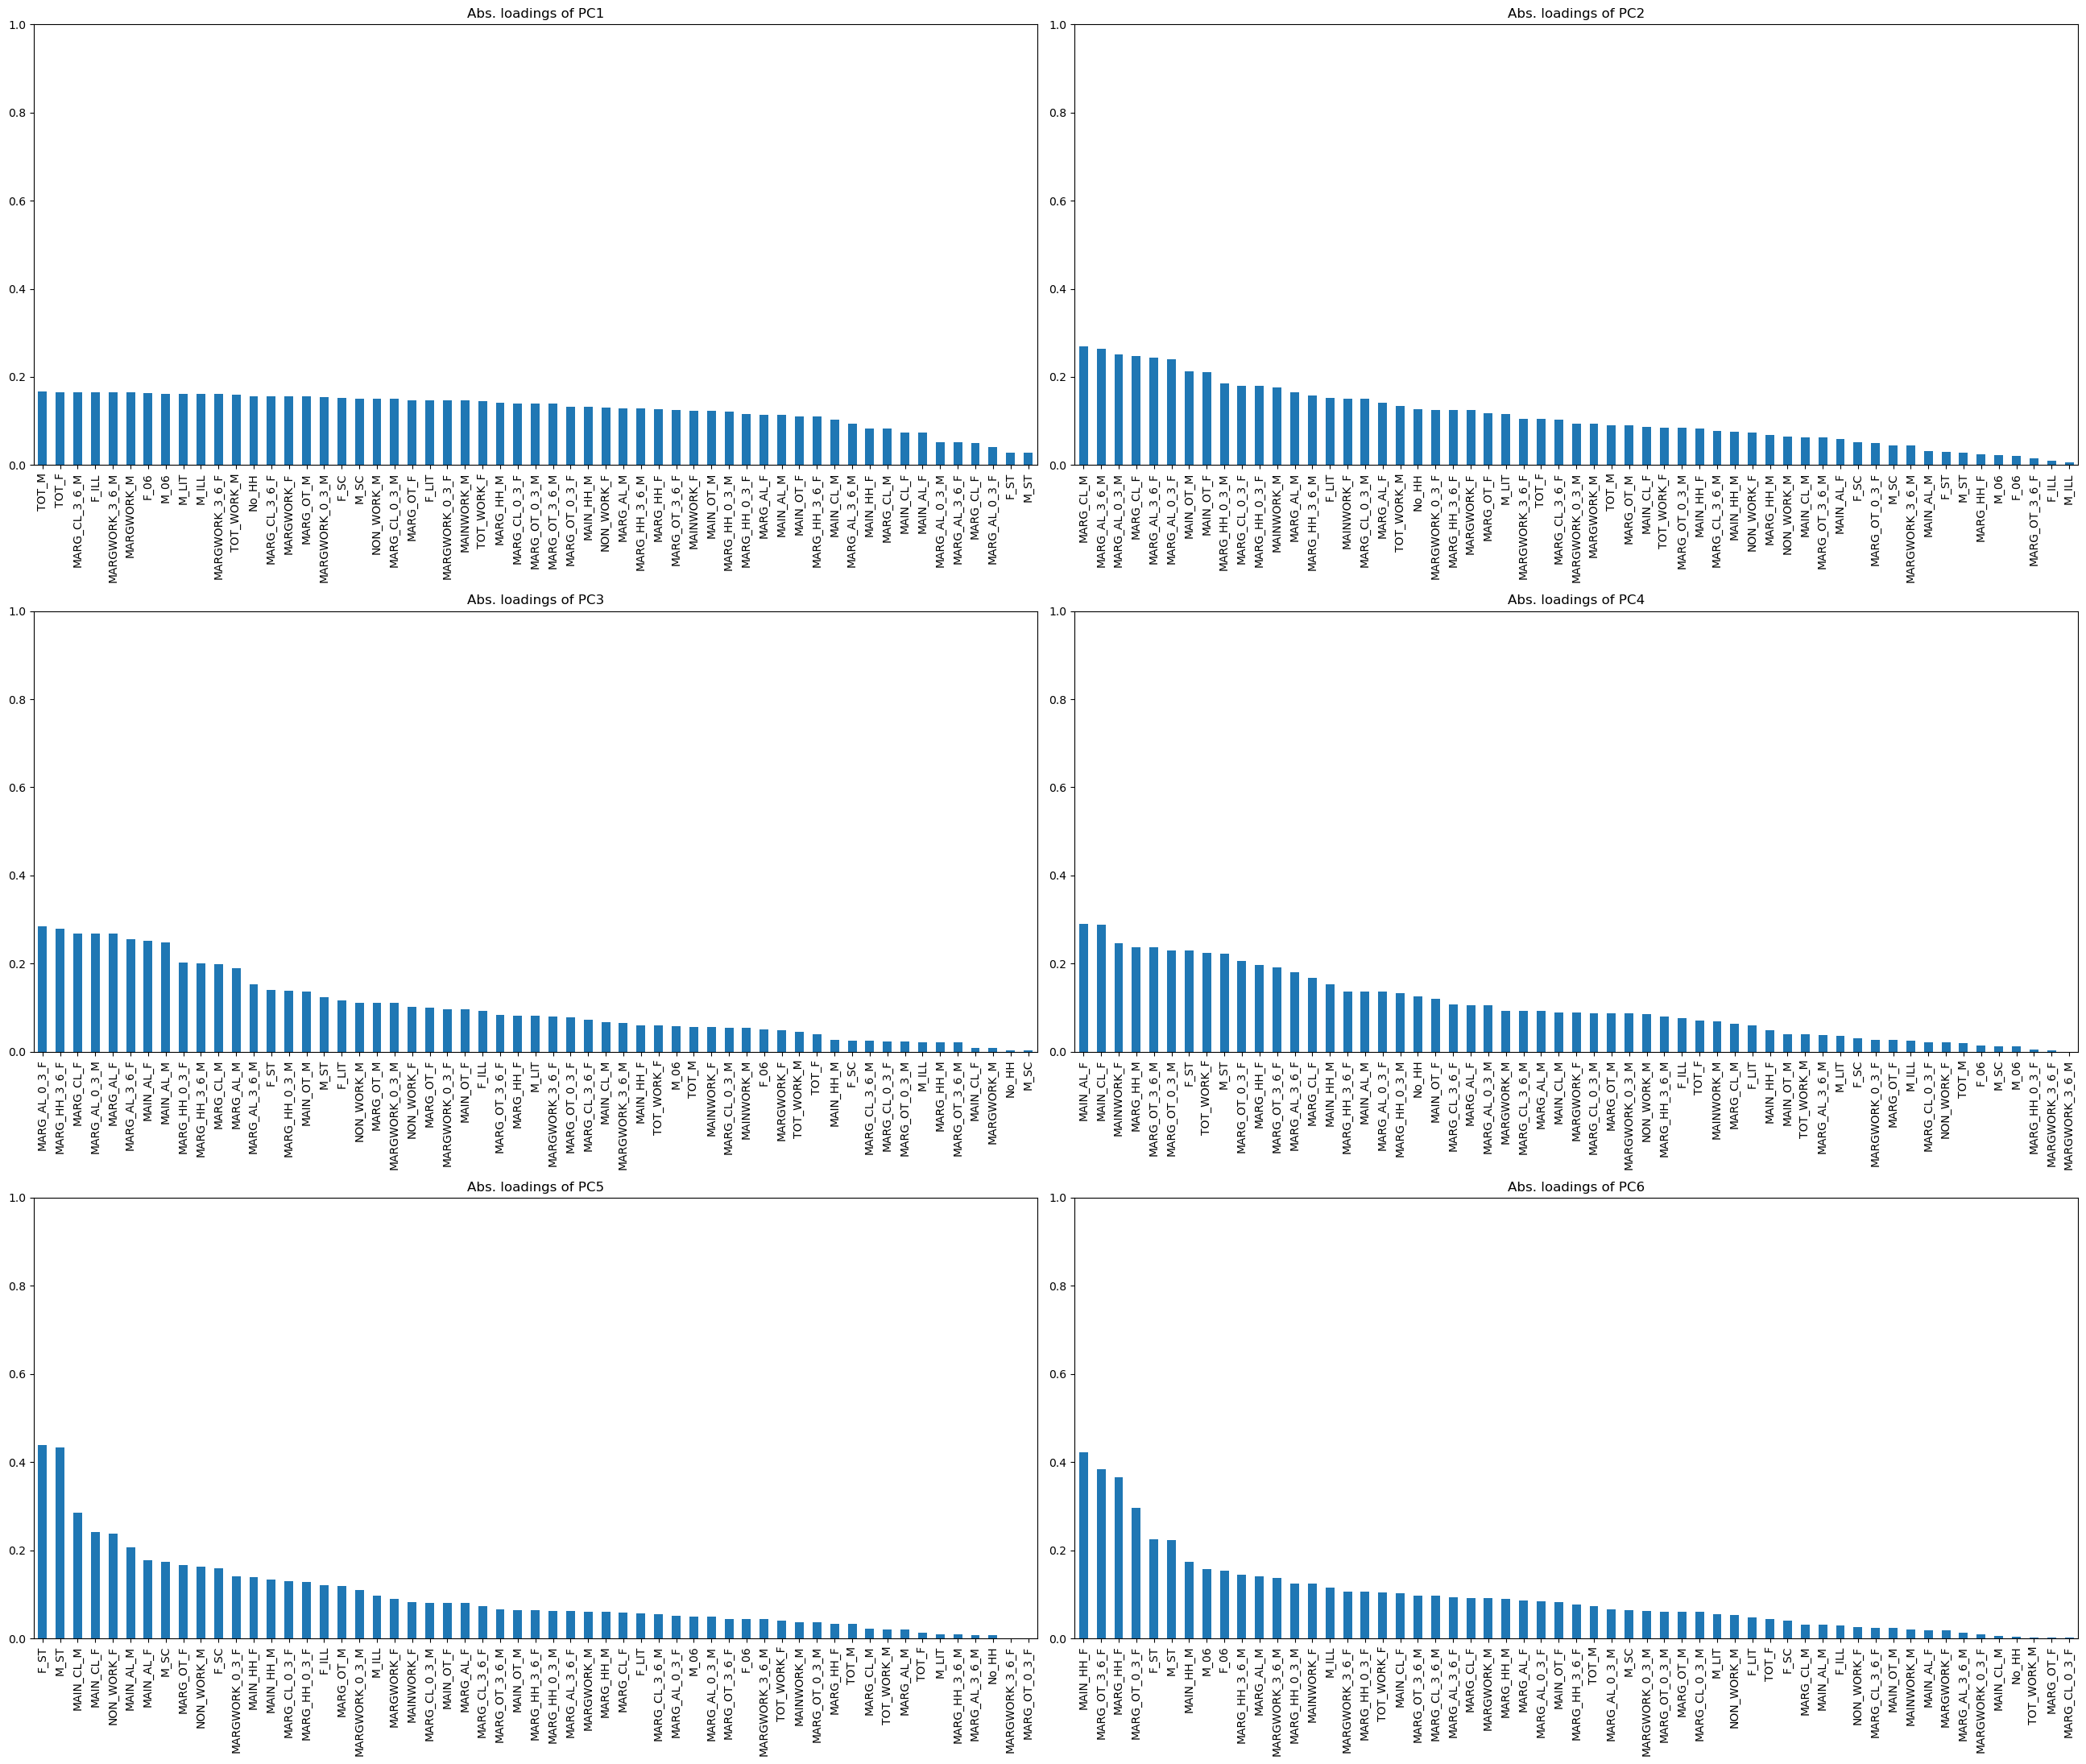

In [74]:
plt.figure(figsize = (26,22))
for i in range(len(p1_extracted_loadings.columns)):
    plt.subplot(3,2,i+1)
    abs(p1_extracted_loadings[p1_extracted_loadings.columns[i]]).T.sort_values(ascending = False).plot.bar()
    plt.yticks(np.arange(0,1.2,.2))
    plt.title('Abs. loadings of {}'.format(p1_extracted_loadings.columns[i]))
    plt.tight_layout()

PC1 has the highest magnitude in  the parameter TOT_M = 0.17

PC2 has the highest magnitude in  the parameter MARG_CL_M = 0.27

PC3 has the highest magnitude in  the parameter MARG_AL_0_3_F = 0.28

PC4 has the highest magnitude in  the parameter MAIN_AL_F = 0.29

PC5 has the highest magnitude in  the parameter F_ST = 0.44

PC6 has the highest magnitude in  the parameter MAIN_HH_F = 0.42

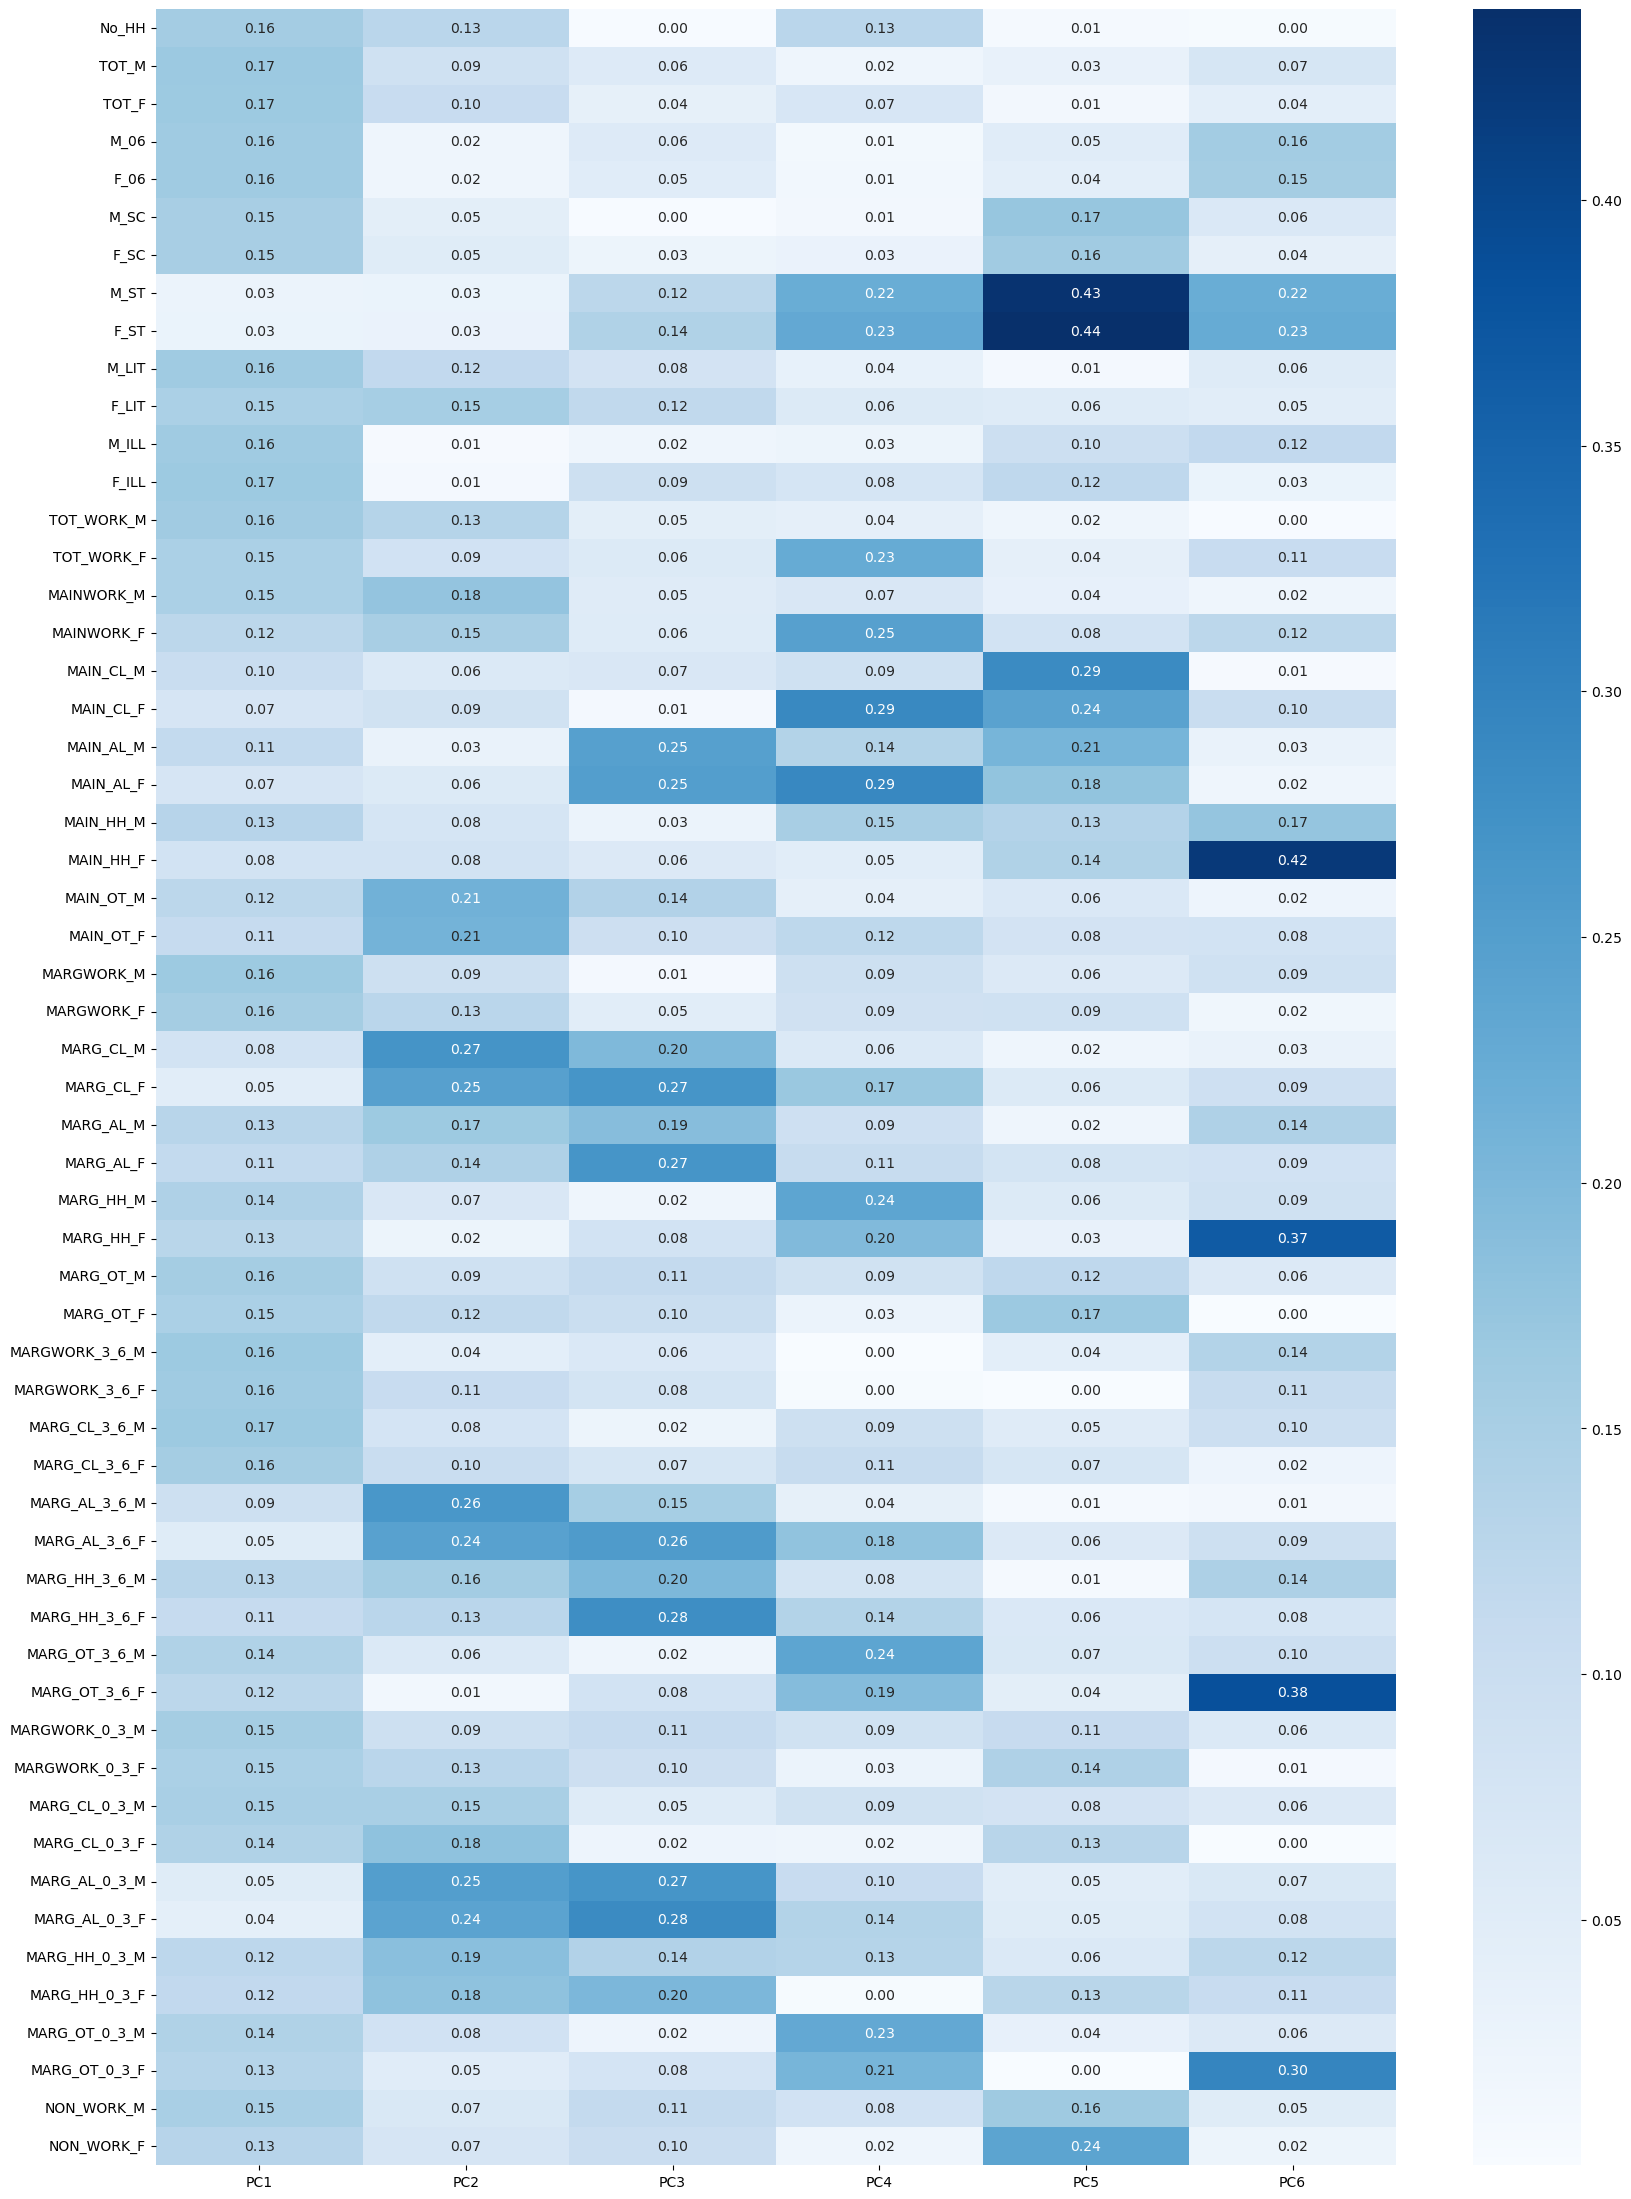

In [77]:
#Compare how the original features influence various PCs
plt.figure(figsize = (20,28))
sns.heatmap(abs(p1_extracted_loadings), annot = True, cmap = 'Blues',fmt = '.2f');

Write linear equation for first PC

In [83]:
linerar_eq=p1_extracted_loadings.PC1.round(decimals = 2).sort_values(ascending=False)
linerar_eq

TOT_F             0.17
MARG_CL_3_6_M     0.17
TOT_M             0.17
F_ILL             0.17
No_HH             0.16
M_ILL             0.16
MARG_CL_3_6_F     0.16
MARGWORK_3_6_F    0.16
MARGWORK_3_6_M    0.16
MARG_OT_M         0.16
MARGWORK_F        0.16
TOT_WORK_M        0.16
M_LIT             0.16
F_06              0.16
M_06              0.16
MARGWORK_M        0.16
F_LIT             0.15
TOT_WORK_F        0.15
MAINWORK_M        0.15
MARG_OT_F         0.15
NON_WORK_M        0.15
MARG_CL_0_3_M     0.15
MARGWORK_0_3_F    0.15
MARGWORK_0_3_M    0.15
F_SC              0.15
M_SC              0.15
MARG_OT_0_3_M     0.14
MARG_OT_3_6_M     0.14
MARG_CL_0_3_F     0.14
MARG_HH_M         0.14
MARG_HH_3_6_M     0.13
MARG_OT_0_3_F     0.13
NON_WORK_F        0.13
MARG_HH_F         0.13
MARG_AL_M         0.13
MAIN_HH_M         0.13
MARG_HH_0_3_M     0.12
MAIN_OT_M         0.12
MAINWORK_F        0.12
MARG_OT_3_6_F     0.12
MARG_HH_0_3_F     0.12
MAIN_OT_F         0.11
MARG_HH_3_6_F     0.11
MARG_AL_F  

In [85]:
linear_eq_pc1 = linerar_eq.to_dict()
print(linear_eq_pc1)

{'TOT_F': 0.17, 'MARG_CL_3_6_M': 0.17, 'TOT_M': 0.17, 'F_ILL': 0.17, 'No_HH': 0.16, 'M_ILL': 0.16, 'MARG_CL_3_6_F': 0.16, 'MARGWORK_3_6_F': 0.16, 'MARGWORK_3_6_M': 0.16, 'MARG_OT_M': 0.16, 'MARGWORK_F': 0.16, 'TOT_WORK_M': 0.16, 'M_LIT': 0.16, 'F_06': 0.16, 'M_06': 0.16, 'MARGWORK_M': 0.16, 'F_LIT': 0.15, 'TOT_WORK_F': 0.15, 'MAINWORK_M': 0.15, 'MARG_OT_F': 0.15, 'NON_WORK_M': 0.15, 'MARG_CL_0_3_M': 0.15, 'MARGWORK_0_3_F': 0.15, 'MARGWORK_0_3_M': 0.15, 'F_SC': 0.15, 'M_SC': 0.15, 'MARG_OT_0_3_M': 0.14, 'MARG_OT_3_6_M': 0.14, 'MARG_CL_0_3_F': 0.14, 'MARG_HH_M': 0.14, 'MARG_HH_3_6_M': 0.13, 'MARG_OT_0_3_F': 0.13, 'NON_WORK_F': 0.13, 'MARG_HH_F': 0.13, 'MARG_AL_M': 0.13, 'MAIN_HH_M': 0.13, 'MARG_HH_0_3_M': 0.12, 'MAIN_OT_M': 0.12, 'MAINWORK_F': 0.12, 'MARG_OT_3_6_F': 0.12, 'MARG_HH_0_3_F': 0.12, 'MAIN_OT_F': 0.11, 'MARG_HH_3_6_F': 0.11, 'MARG_AL_F': 0.11, 'MAIN_AL_M': 0.11, 'MAIN_CL_M': 0.1, 'MARG_AL_3_6_M': 0.09, 'MARG_CL_M': 0.08, 'MAIN_HH_F': 0.08, 'MAIN_AL_F': 0.07, 'MAIN_CL_F': 0.07,

In [90]:
linear_eq_pc1 = str(linear_eq_pc1).replace(":", " * ")
linear_eq_pc1 = str(linear_eq_pc1).replace(",", " + ")
print(' The linear equation for PC1 is ',linear_eq_pc1)

 The linear equation for PC1 is  {'TOT_F'  *     0.17 +  'MARG_CL_3_6_M'  *     0.17 +  'TOT_M'  *     0.17 +  'F_ILL'  *     0.17 +  'No_HH'  *     0.16 +  'M_ILL'  *     0.16 +  'MARG_CL_3_6_F'  *     0.16 +  'MARGWORK_3_6_F'  *     0.16 +  'MARGWORK_3_6_M'  *     0.16 +  'MARG_OT_M'  *     0.16 +  'MARGWORK_F'  *     0.16 +  'TOT_WORK_M'  *     0.16 +  'M_LIT'  *     0.16 +  'F_06'  *     0.16 +  'M_06'  *     0.16 +  'MARGWORK_M'  *     0.16 +  'F_LIT'  *     0.15 +  'TOT_WORK_F'  *     0.15 +  'MAINWORK_M'  *     0.15 +  'MARG_OT_F'  *     0.15 +  'NON_WORK_M'  *     0.15 +  'MARG_CL_0_3_M'  *     0.15 +  'MARGWORK_0_3_F'  *     0.15 +  'MARGWORK_0_3_M'  *     0.15 +  'F_SC'  *     0.15 +  'M_SC'  *     0.15 +  'MARG_OT_0_3_M'  *     0.14 +  'MARG_OT_3_6_M'  *     0.14 +  'MARG_CL_0_3_F'  *     0.14 +  'MARG_HH_M'  *     0.14 +  'MARG_HH_3_6_M'  *     0.13 +  'MARG_OT_0_3_F'  *     0.13 +  'NON_WORK_F'  *     0.13 +  'MARG_HH_F'  *     0.13 +  'MARG_AL_M'  *     0.13 +  'MAIN_HH_M